# Fundamentals-of-Neural-Networks
This project is part of the 5LSH0 - Computer Vision AI and 3D Data Analysis course at TU Eindhoven. It focuses on the fundamentals of neural networks, with an emphasis on implementing a Multi-Layer Perceptron (MLP) to classify digits from the MNIST dataset. You will work with fully-connected layers, activation functions (ReLU and Sigmoid), and mini-batch SGD with cross-entropy loss. The project also involves analyzing the model’s performance, calculating trainable parameters, and experimenting with different loss functions such as Cross-Entropy, Dice, and Focal Loss to enhance accuracy.

### Variables explanation
- **W1**: Weights for the first layer (input to hidden layer)
- **b1**: Bias for the first layer
- **W2**: Weights for the second layer (hidden to output layer)
- **b2**: Bias for the second layer
- **A1**: Activation of the first layer (output after applying activation function to Z1)
- **A2**: Output of the network (after applying softmax activation function to Z2)
- **Z1**: Linear transformation for the first layer (W1.dot(values) + b1)
- **Z2**: Linear transformation for the second layer (W2.dot(A1) + b2)
- **m**: Number of training examples (samples in the training set)
- **n**: Number of features (including labels)
- **values**: Input features (e.g., pixel values for MNIST images)
- **labels**: Ground truth labels (e.g., corresponding digit labels for MNIST images)
- **dW1**: Gradient of the weights for the first layer
- **db1**: Gradient of the bias for the first layer
- **dW2**: Gradient of the weights for the second layer
- **db2**: Gradient of the bias for the second layer
- **alpha**: Learning rate (step size for weight updates)

### Example outcome

gradient descen iterations 500,  alpha 0.1,  sigmoid - traininig 10min, accuracy 0.7, loss 1.16
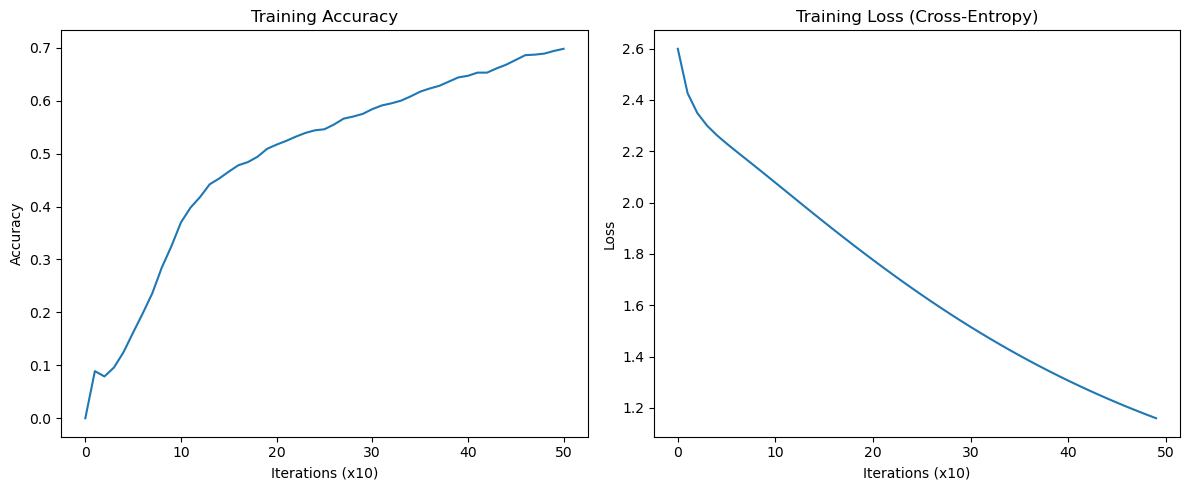

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
DEBUG = True # Used to display additional information during program execution
TEST_SIZE = 1000
VALIDATION_SIZE = 1000
ALPHA = 0.1
ITERATIONS = 1000

In [12]:
def show_image(values, index):
    """
    Display image selected by index from gives values matrix
    """
    image = values[:, index, None]
    image = image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(image)
    plt.show()

In [13]:
#Load dataset from a file
data = pd.read_csv('Datasets/MNIST_CSV/mnist.csv', header=None)
if DEBUG:
    print(data.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    4    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    1    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    9    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


n = 785
m = 70000
labels_train.shape = (69000,)
values_train.shape = (784, 69000)
labels_test.shape = (1000,)
values_test.shape = (784, 1000)


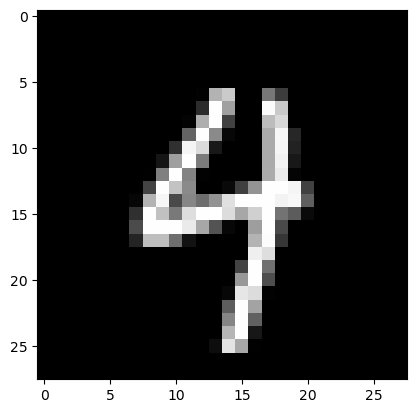

In [14]:
# Divide dataset to test, validation and train sets

data = np.array(data)
m, n = data.shape # n is amount of features including labels 

np.random.shuffle(data)

data_test = data[0:TEST_SIZE].T
labels_test = data_test[0]
values_test = data_test[1:n] / 255

data_validation = data[TEST_SIZE:(TEST_SIZE+ VALIDATION_SIZE)].T
labels_validation = data_validation[0]
values_validation = data_validation[1:n] / 255

data_train = data[TEST_SIZE:m].T
labels_train = data_train[0]
values_train = data_train[1:n] / 255

if DEBUG:
    print("n =",n)
    print("m =",m)
    print("labels_train.shape =",labels_train.shape)
    print("values_train.shape =",values_train.shape)
    print("labels_test.shape =",labels_test.shape)
    print("values_test.shape =",values_test.shape)
    show_image(values_train, 1)

In [15]:
def init_params():
    """Initialize NN weights and biases"""
    #
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5

    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """Calculate ReLu activation function"""
    return np.maximum(0, Z)

def sigmoid(Z):
    """Calculate Sigmoid activation function"""
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    """Calculate softmax of given vector Z"""
    Z -= np.max(Z, axis=0)
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def forward_propagation(W1, b1, W2, b2, values):
    """Pass through the NN input->output"""
    Z1 = W1.dot(values) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(labels):
    """Perform one hot encoding returning a binary matrix based on provided labels"""
    # Class 0 -> [1,0,0,...]
    # Class 1 -> [0,1,0,...]
    # ...

    one_hot_labels = np.zeros((labels.size, labels.max() + 1))
    one_hot_labels[np.arange(labels.size), labels] = 1
    return one_hot_labels.T

def deriv_ReLU(Z):
    """Derivative of ReLU activation function"""
    return Z > 0

def deriv_sigmoid(Z):
    """Calculate derivative of sigmoid activation function"""
    return sigmoid(Z) * (1 - sigmoid(Z))
    
def back_propagation(Z1, A1, Z2, A2, W2, values, labels):
    """Perform back propagation through NN output->input"""

    # Calculate output error compared to one hot labels
    one_hot_labels = one_hot(labels)
    dZ2 = A2 - one_hot_labels

    # Calculate gradients for weights in second layer
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, 1)

    # calculate first layers error by propagating error backwards
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)

    # Calculate gradients for weights in first layer
    dW1 = 1 / m * dZ1.dot(values.T)
    db1 = 1 / m * np.sum(dZ1, 1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """Update NN weights and biases"""
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * np.reshape(db1, (10,1)) # reshape from single value to vector
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * np.reshape(db2, (10,1)) # reshape from single value to vector
    return W1, b1, W2, b2

In [16]:
def cross_entropy_loss(A2, labels):
    """
    Calculate cross-entropy loss 
    """
    m = labels.shape[1]
    log_likelihood = -np.log(A2[labels == 1])
    loss = np.sum(log_likelihood) / m
    return loss

In [17]:
def get_predictions(A2):
    """Use highest value from given vector for prediction"""
    return np.argmax(A2, 0)

def get_accuracy(predictions, labels):
    """Calculate accuracy based on given predictions and labels"""
    return np.sum(predictions == labels) / labels.size

def make_predictions(values, W1, b1, W2, b2):
    """Make prediction based on chosen values using given model parameters"""
    _, _, _, A2 = forward_propagation(W1,b1,W2,b2,values)
    predictions = get_predictions(A2)
    return predictions
    
def gradient_descent(values_train, labels_train, iterations, alpha, values_validation, labels_validation ):
    """Create a 3 layer NN and train it using gradient descent method"""
    W1, b1, W2, b2 = init_params()
    accuracy_history = [0]
    loss_history = []
    for i in range(iterations):
        
        # NN training 
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, values_train)
        dW1, db1, dW2, db2 = back_propagation(Z1, A1, Z2, A2, W2, values_train, labels_train)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # Training pogress 
        if i % 10 == 0:
            print("Iteration:", i)

            # make predictions and test accuracy using validation set
            predictions = make_predictions(values_validation, W1, b1, W2, b2)
            accuracy = get_accuracy(predictions, labels_validation)
            loss = cross_entropy_loss(A2, one_hot(labels_train))
            print("Accuracy: ", accuracy)
            print("Loss: ", loss)

            # present traininig progress
            accuracy_history.append(accuracy)
            loss_history.append(loss)

            fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

            ax[0].plot(accuracy_history)
            ax[0].set_title("Training Accuracy")
            ax[0].set_xlabel("Iterations (x10)")
            ax[0].set_ylabel("Accuracy")

            ax[1].plot(loss_history)
            ax[1].set_title("Training Loss")
            ax[1].set_xlabel("Iterations (x10)")
            ax[1].set_ylabel("Loss")

            plt.tight_layout()
            plt.show()

    return W1, b1, W2, b2

Iteration: 0
Accuracy:  0.093
Loss:  3.4688400311104437


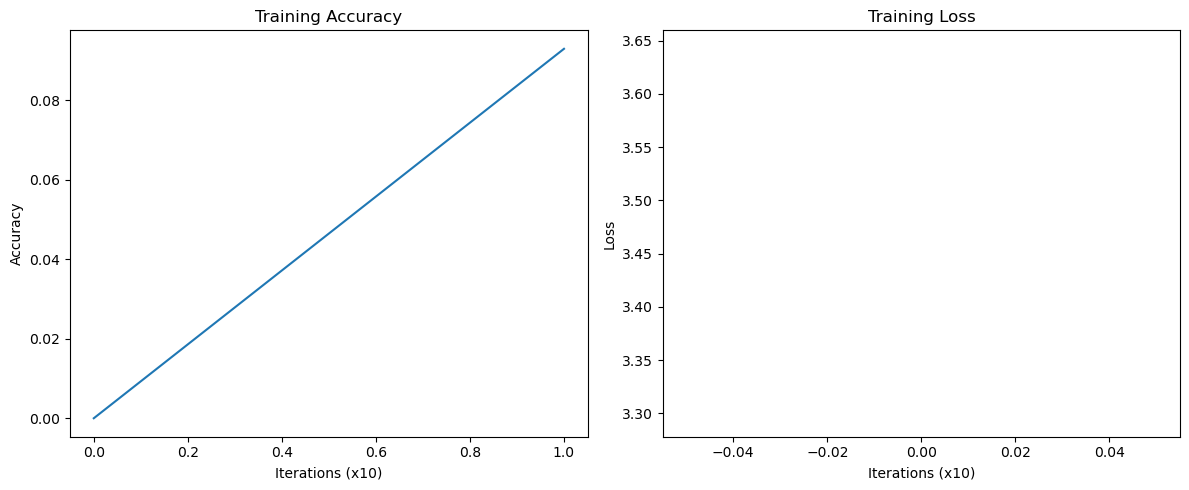

Iteration: 10
Accuracy:  0.144
Loss:  2.392188923676879


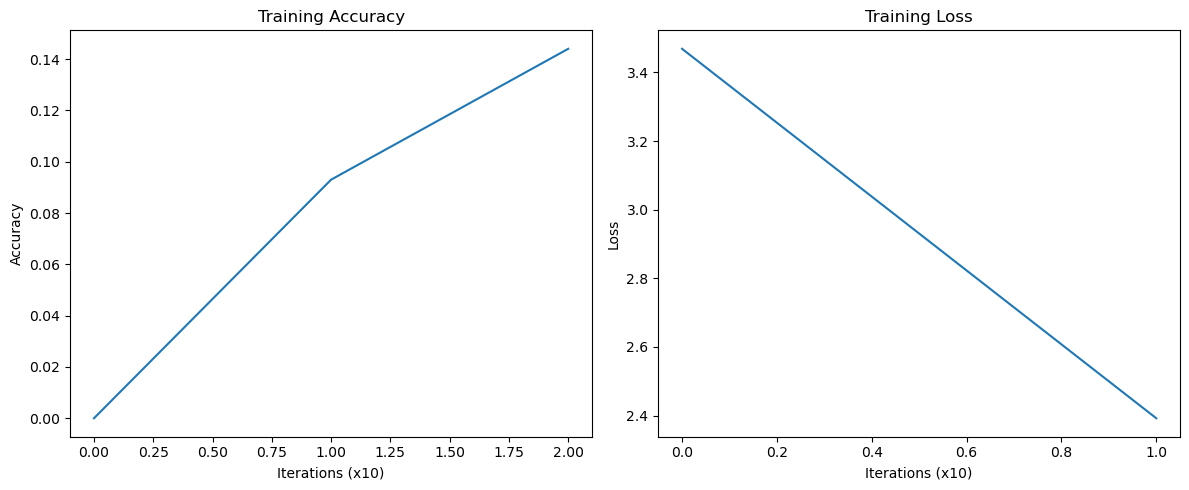

Iteration: 20
Accuracy:  0.181
Loss:  2.2575063995573688


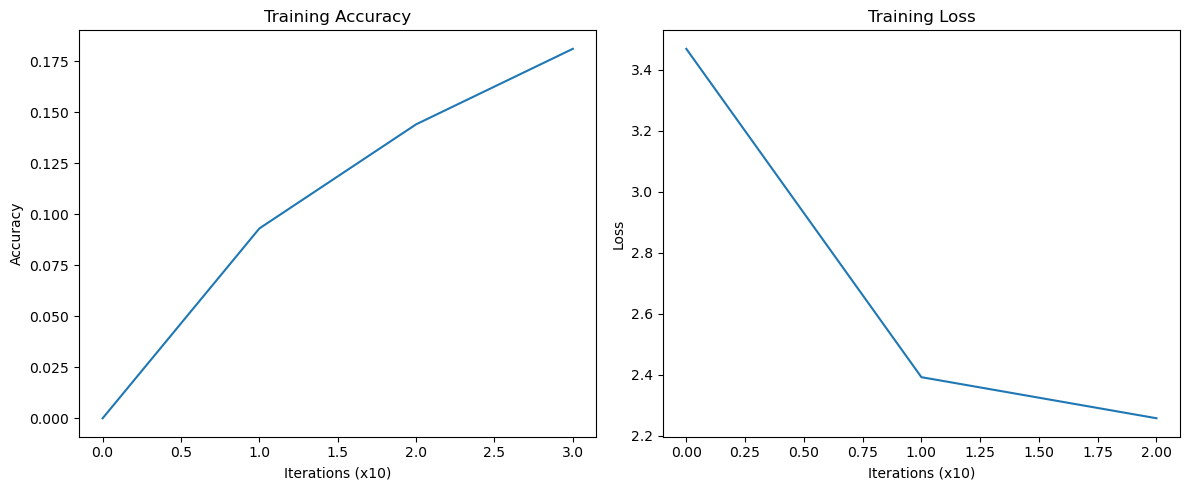

Iteration: 30
Accuracy:  0.237
Loss:  2.162445309633611


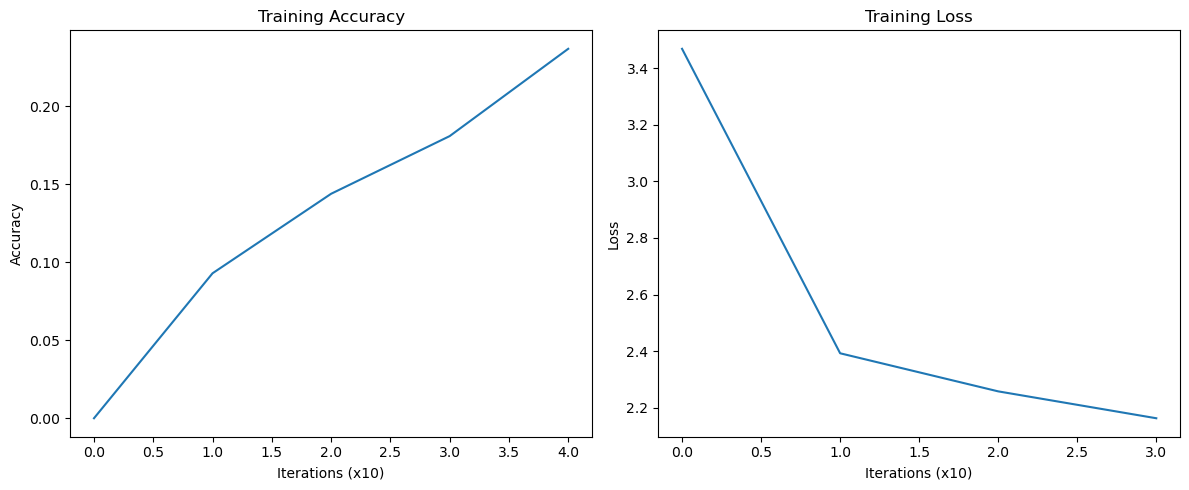

Iteration: 40
Accuracy:  0.278
Loss:  2.0630515237343827


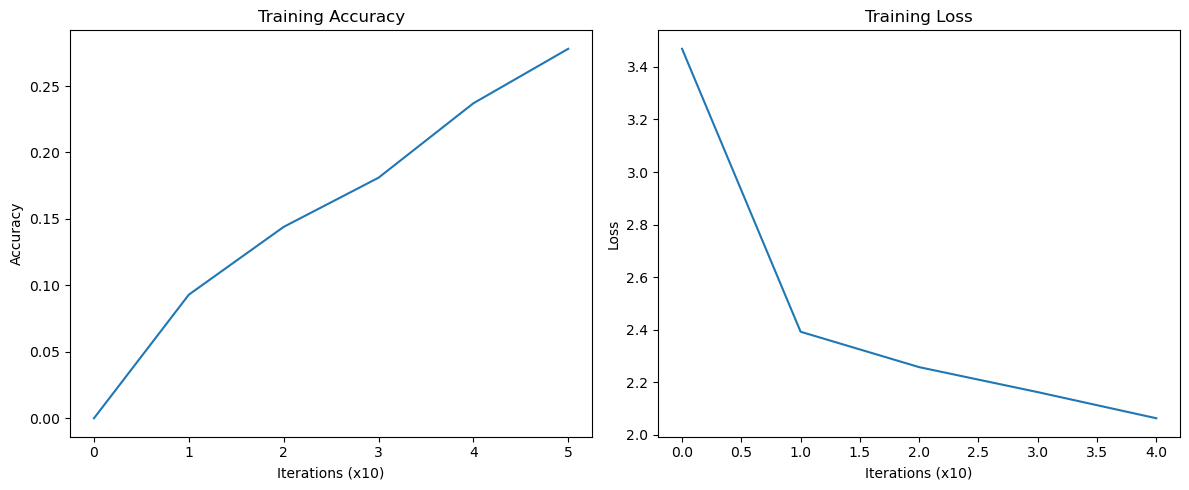

Iteration: 50
Accuracy:  0.315
Loss:  1.9574178638958943


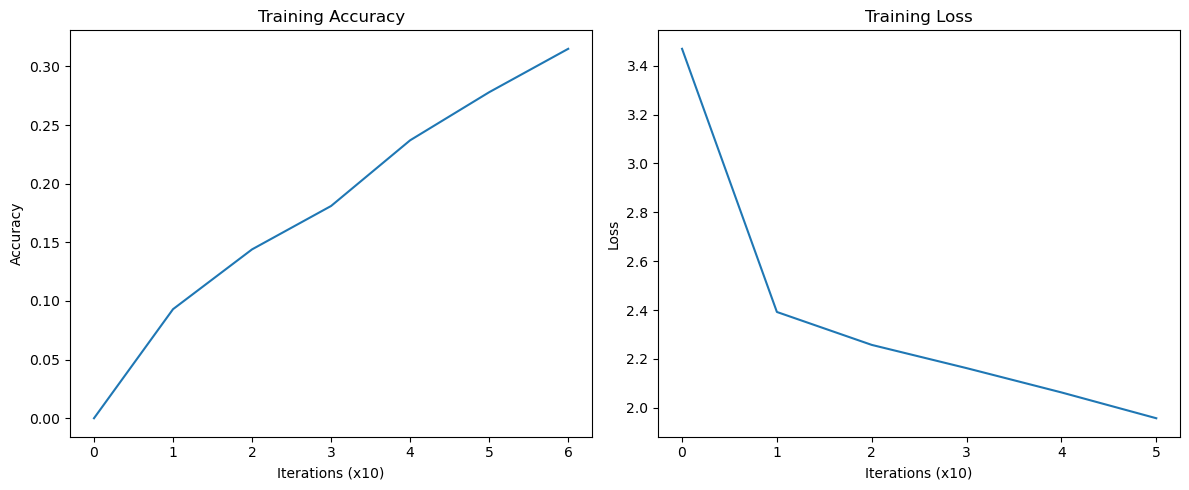

Iteration: 60
Accuracy:  0.367
Loss:  1.8471073289136954


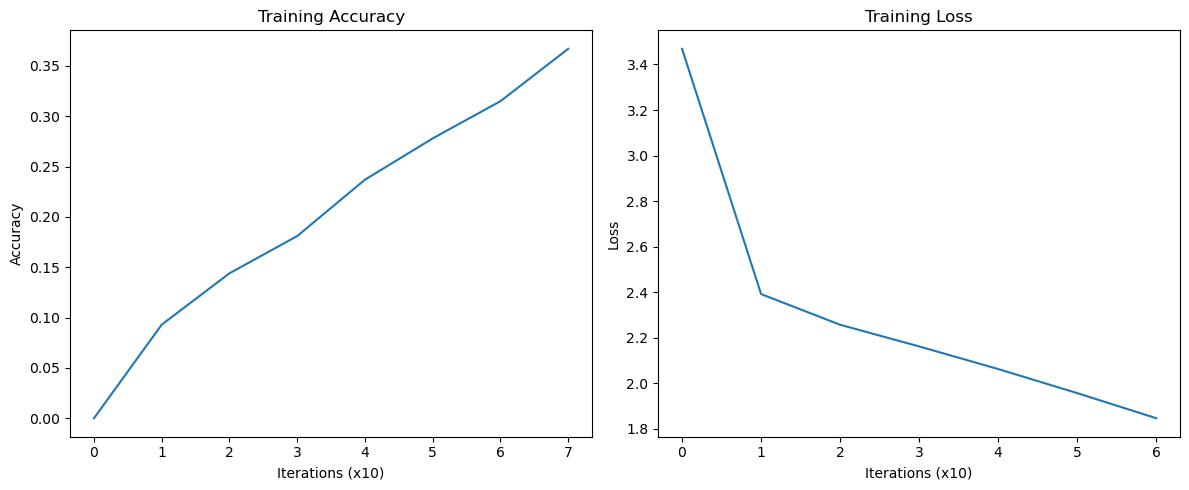

Iteration: 70
Accuracy:  0.417
Loss:  1.727333664555445


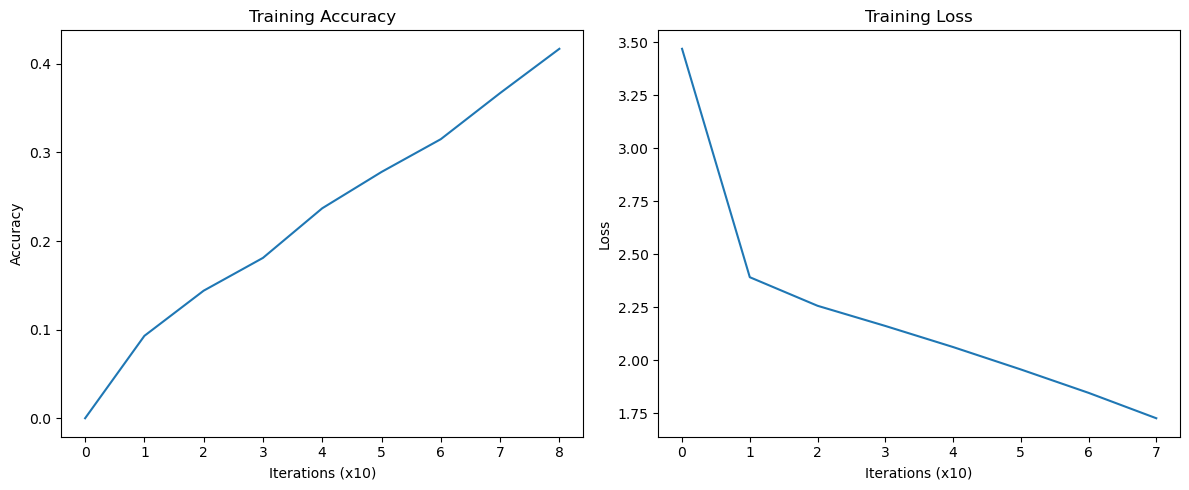

Iteration: 80
Accuracy:  0.459
Loss:  1.5905651042096796


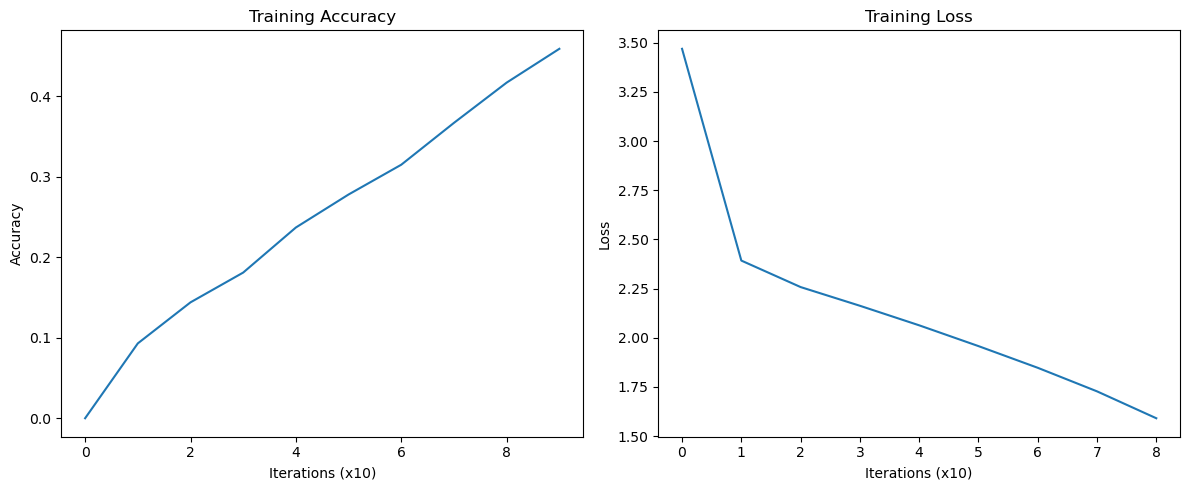

Iteration: 90
Accuracy:  0.512
Loss:  1.447817861704649


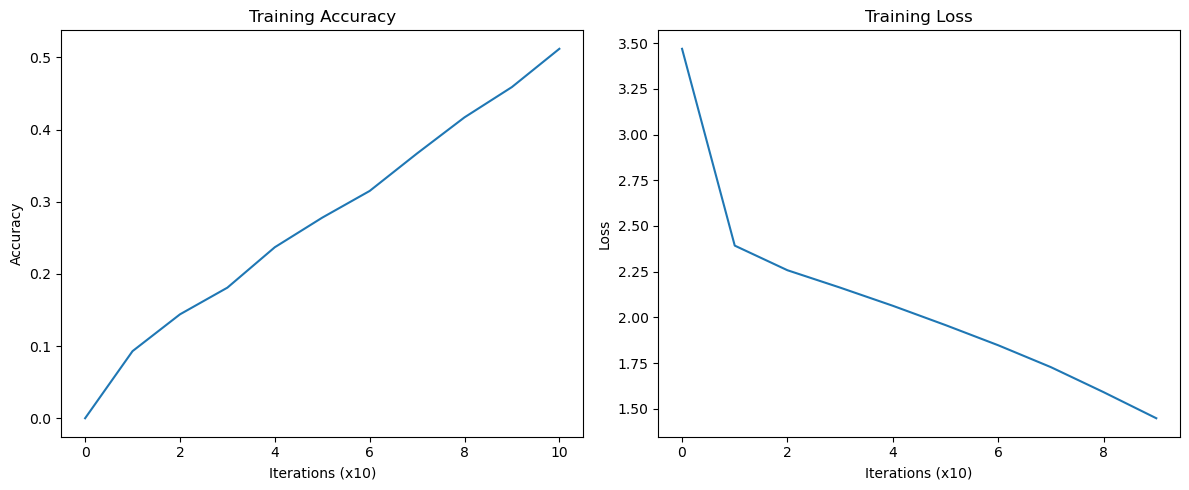

Iteration: 100
Accuracy:  0.549
Loss:  1.3222112170278408


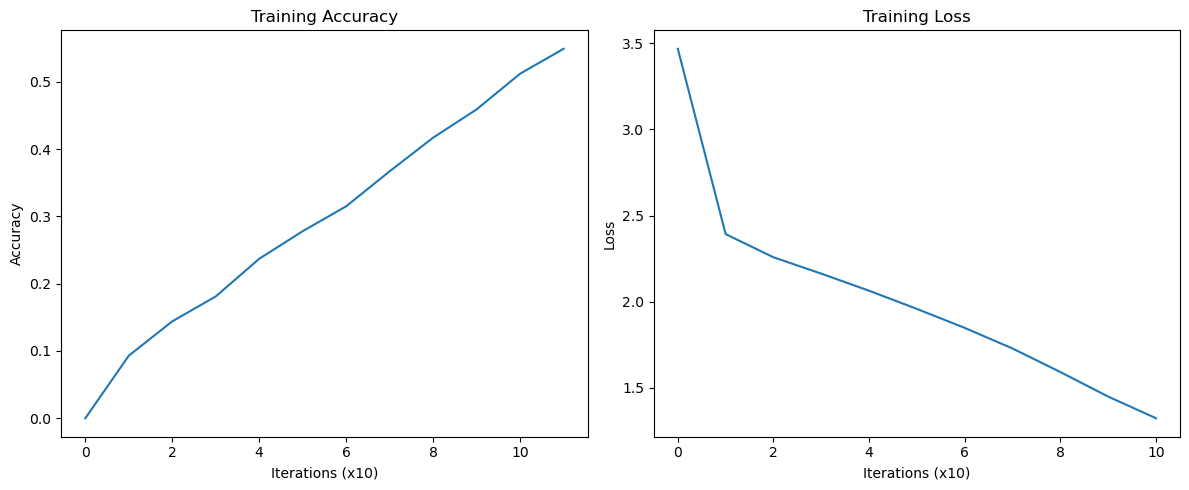

Iteration: 110
Accuracy:  0.574
Loss:  1.2186551902316232


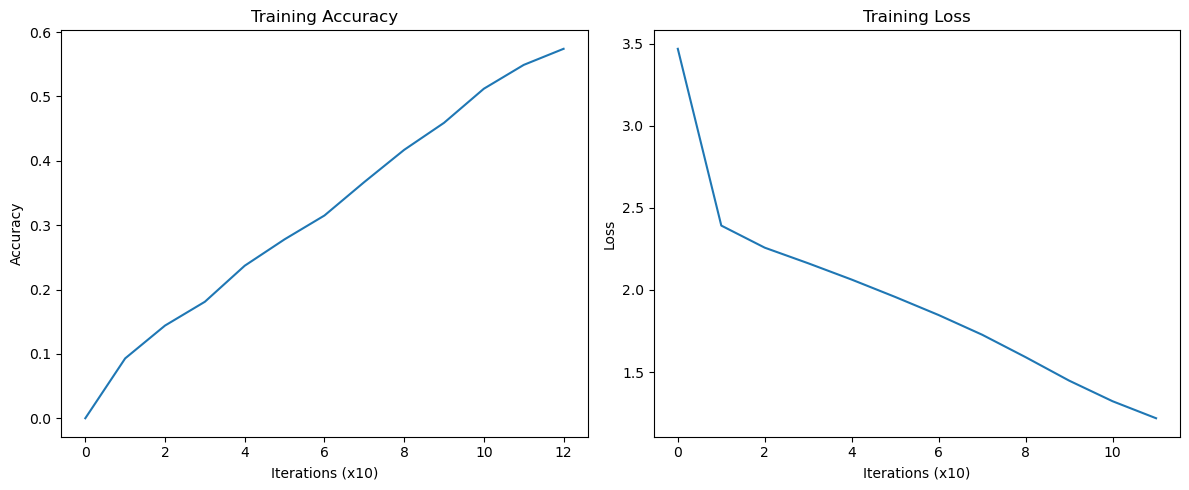

Iteration: 120
Accuracy:  0.604
Loss:  1.1333190555327004


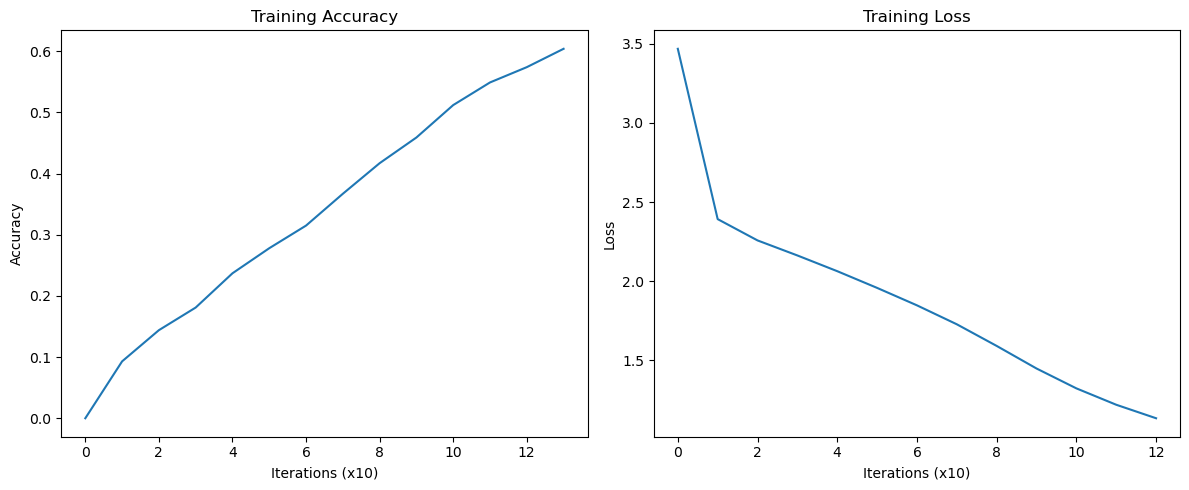

Iteration: 130
Accuracy:  0.633
Loss:  1.0618517713970475


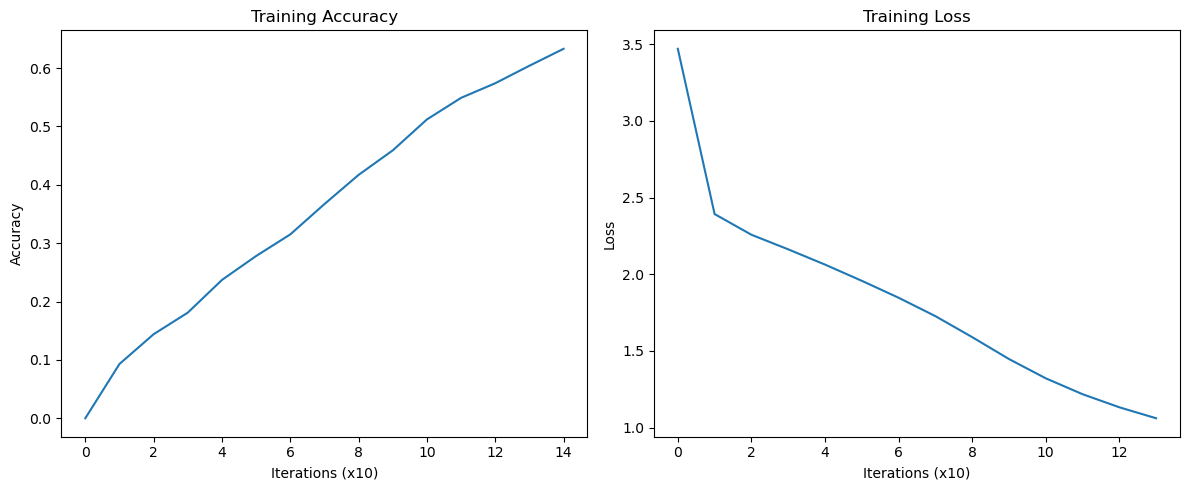

Iteration: 140
Accuracy:  0.651
Loss:  1.0011034313782343


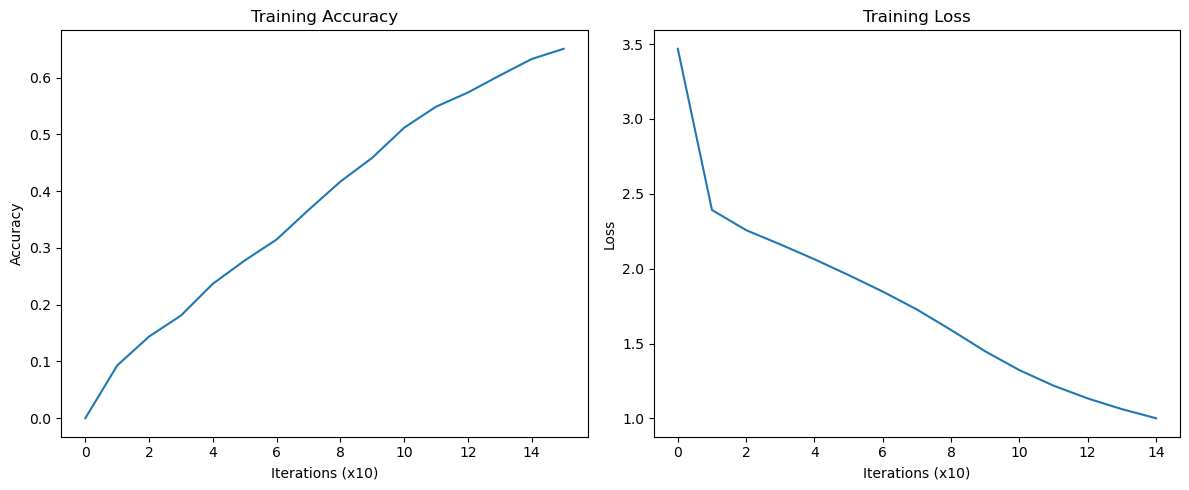

Iteration: 150
Accuracy:  0.666
Loss:  0.9489940794778303


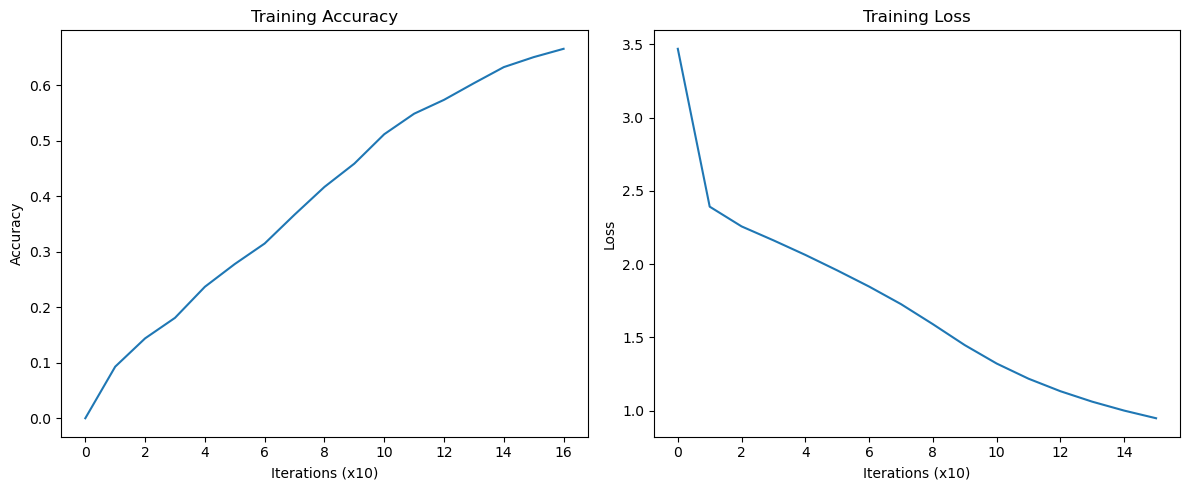

Iteration: 160
Accuracy:  0.68
Loss:  0.9039421113938377


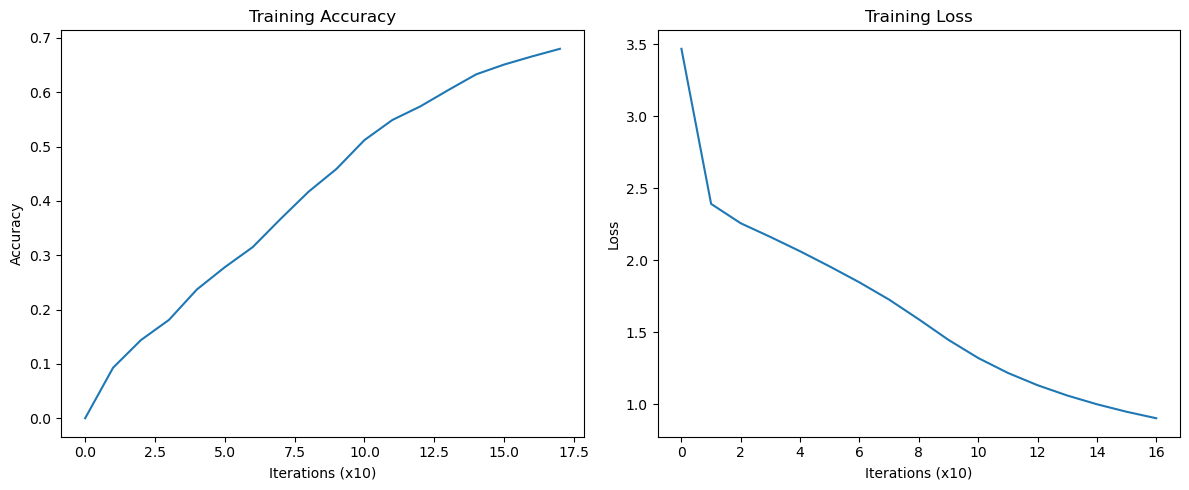

Iteration: 170
Accuracy:  0.699
Loss:  0.864830267976119


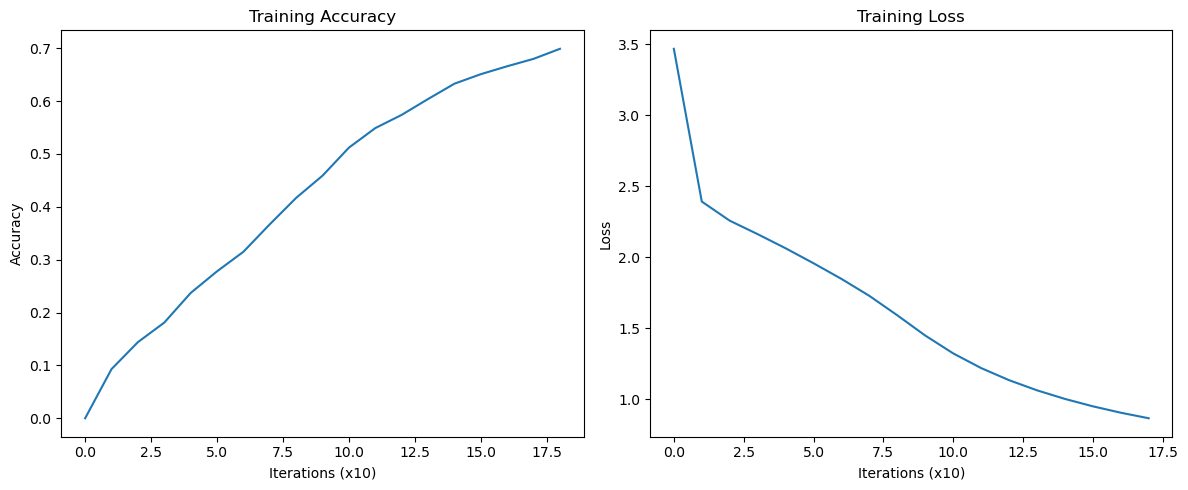

Iteration: 180
Accuracy:  0.709
Loss:  0.830540536604732


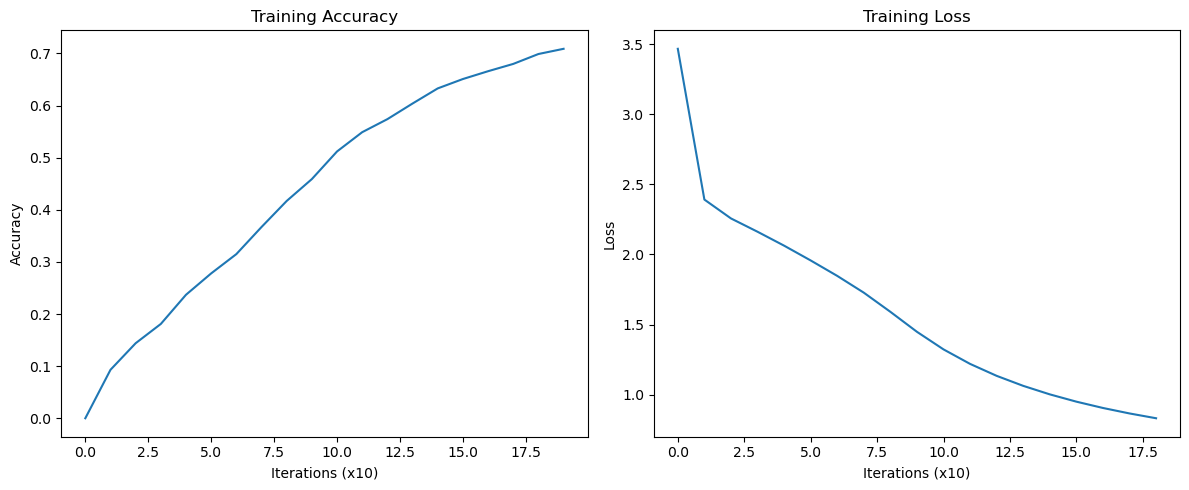

Iteration: 190
Accuracy:  0.72
Loss:  0.8005785861268113


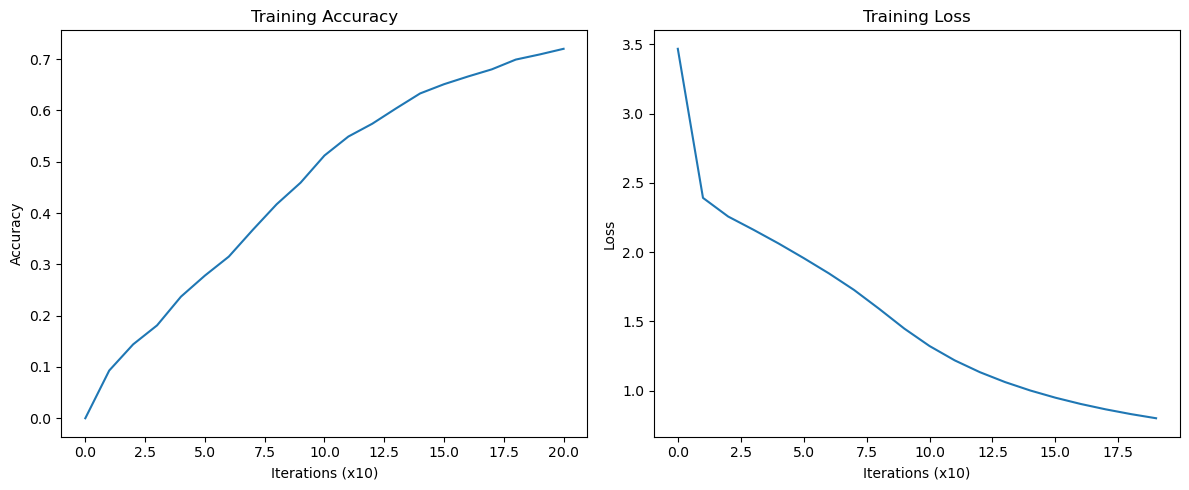

Iteration: 200
Accuracy:  0.728
Loss:  0.7743306081824542


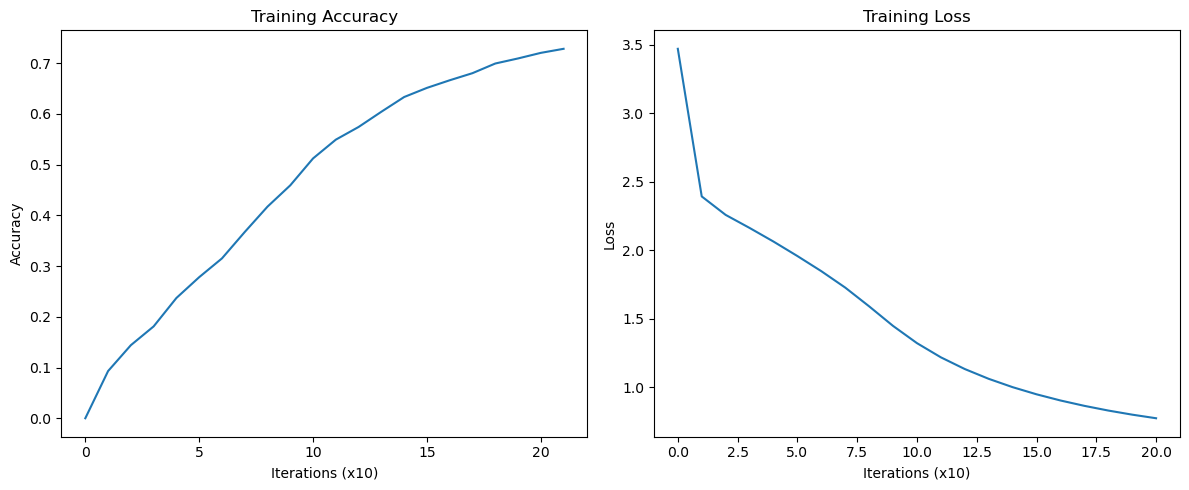

Iteration: 210
Accuracy:  0.733
Loss:  0.7511871637347504


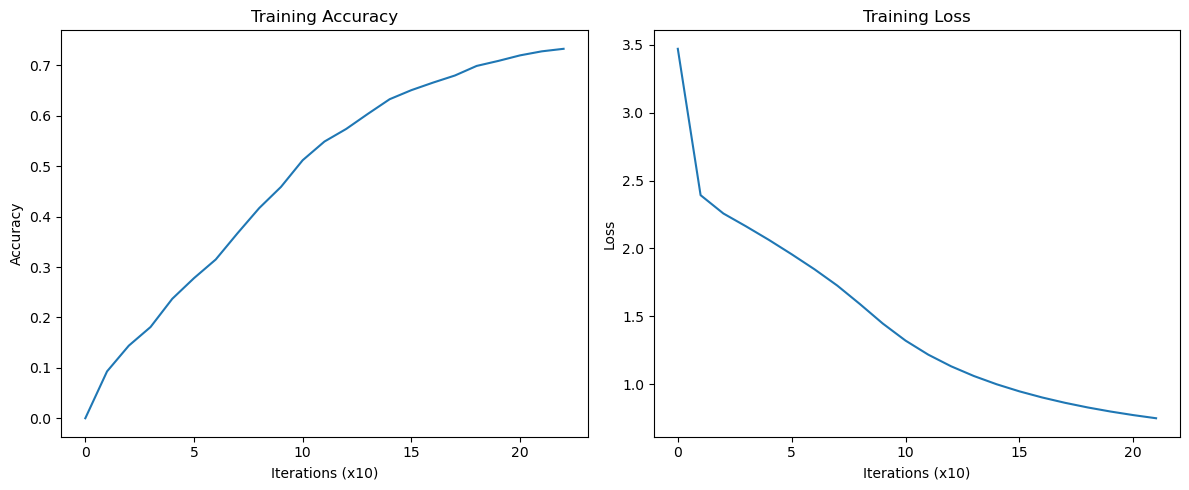

Iteration: 220
Accuracy:  0.737
Loss:  0.7306538135818846


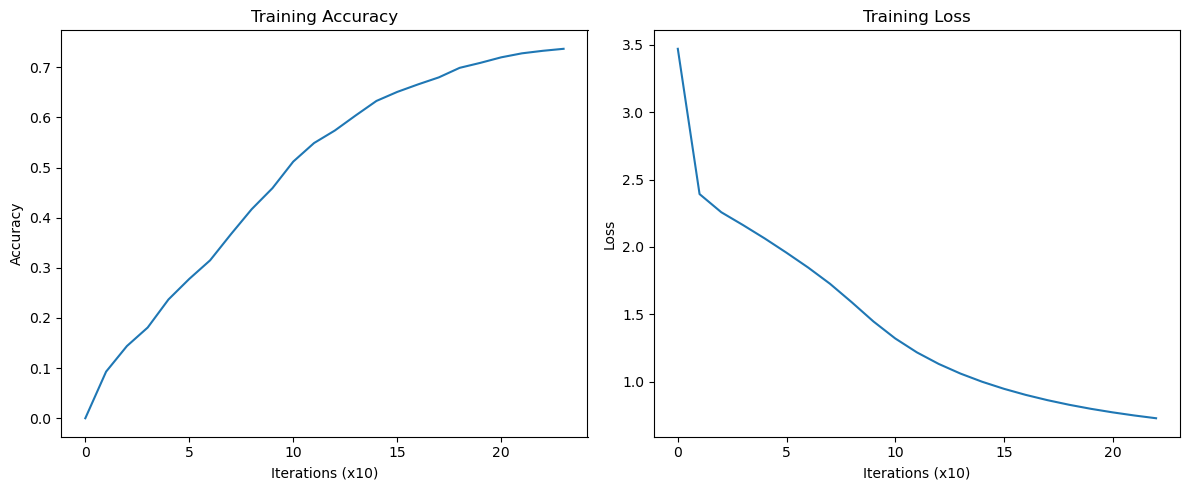

Iteration: 230
Accuracy:  0.742
Loss:  0.7123161176514382


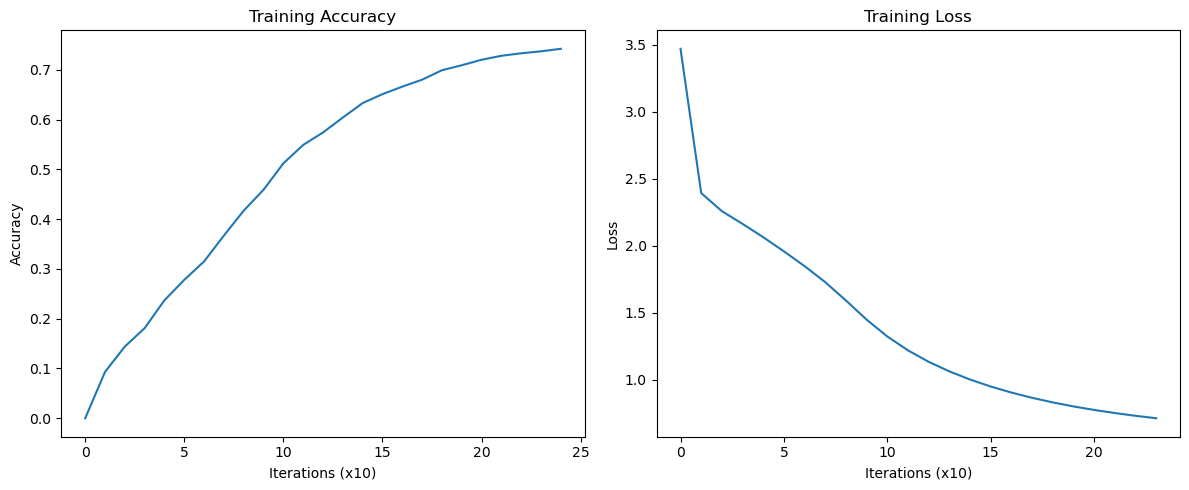

Iteration: 240
Accuracy:  0.746
Loss:  0.6958406774704673


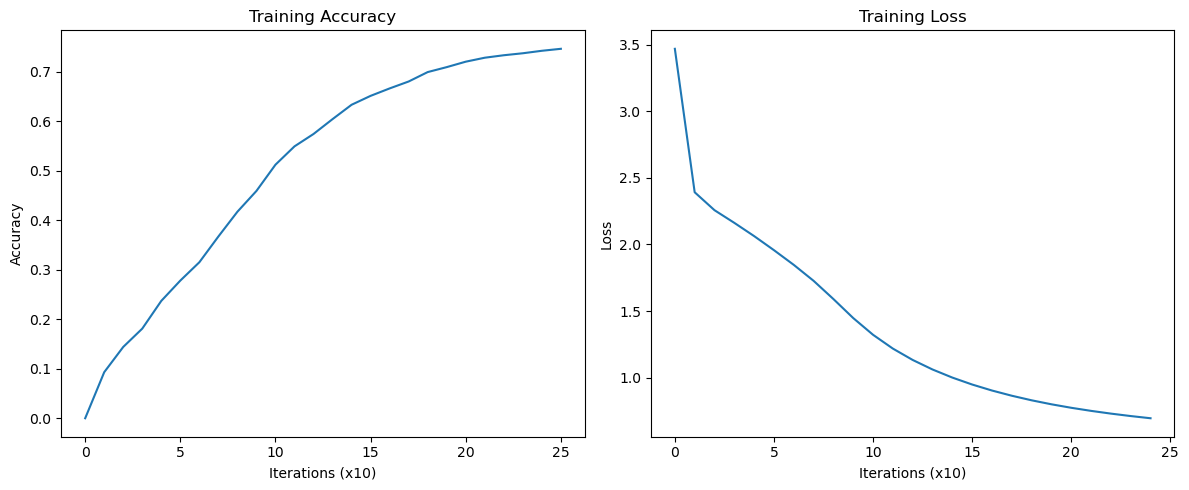

Iteration: 250
Accuracy:  0.747
Loss:  0.6809581105082593


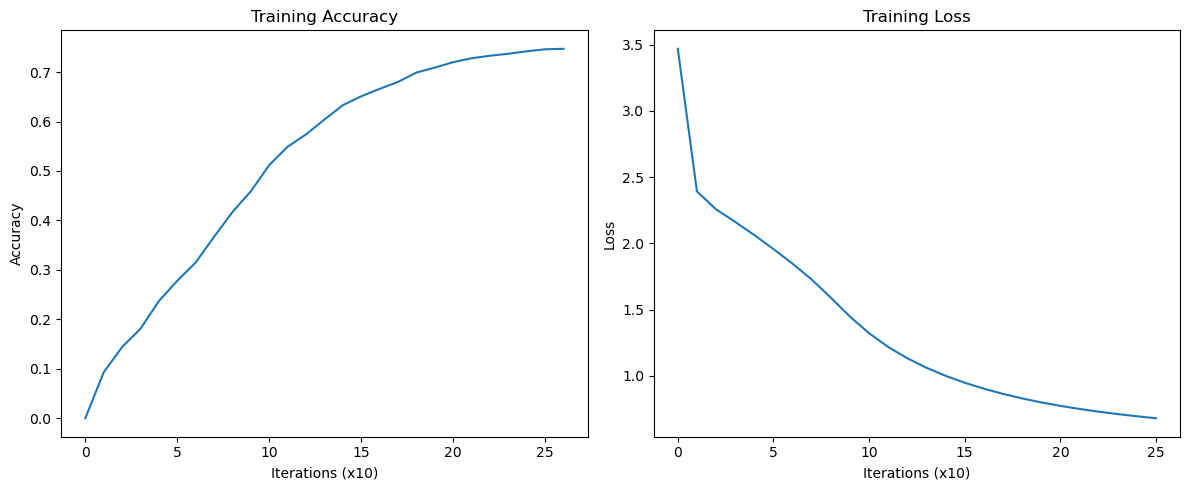

Iteration: 260
Accuracy:  0.756
Loss:  0.66738534343442


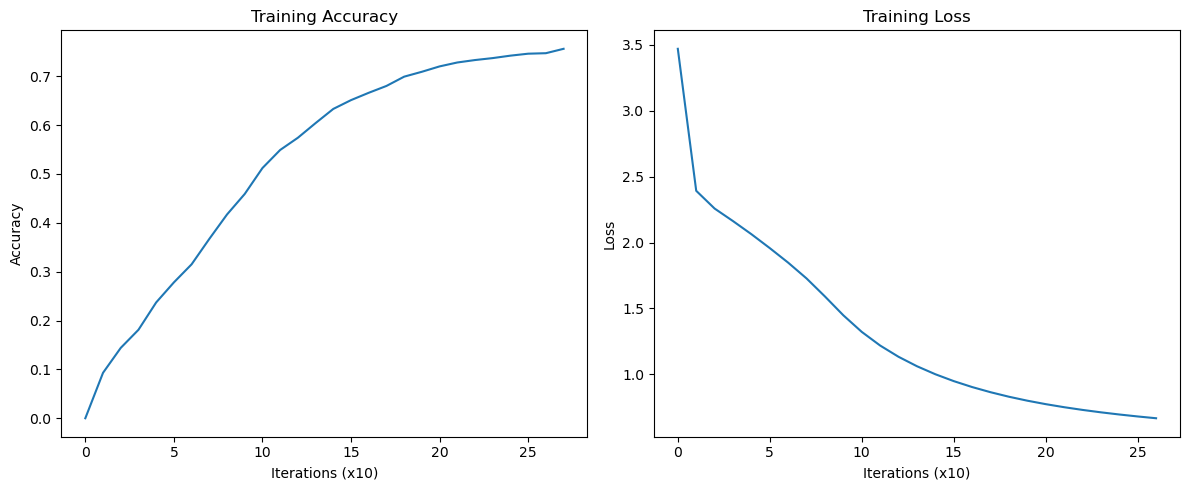

Iteration: 270
Accuracy:  0.761
Loss:  0.6549645072891068


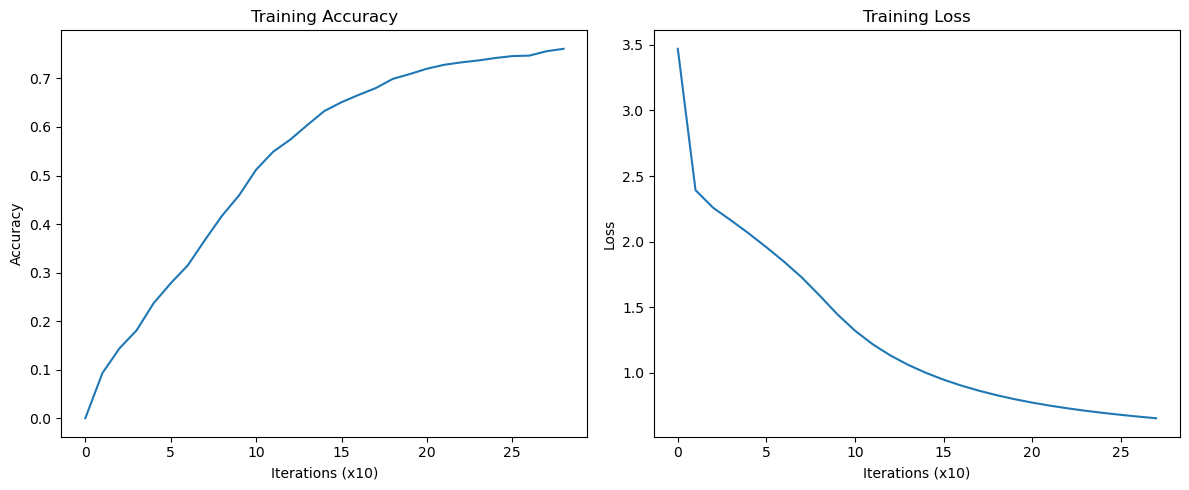

Iteration: 280
Accuracy:  0.77
Loss:  0.6435583291667801


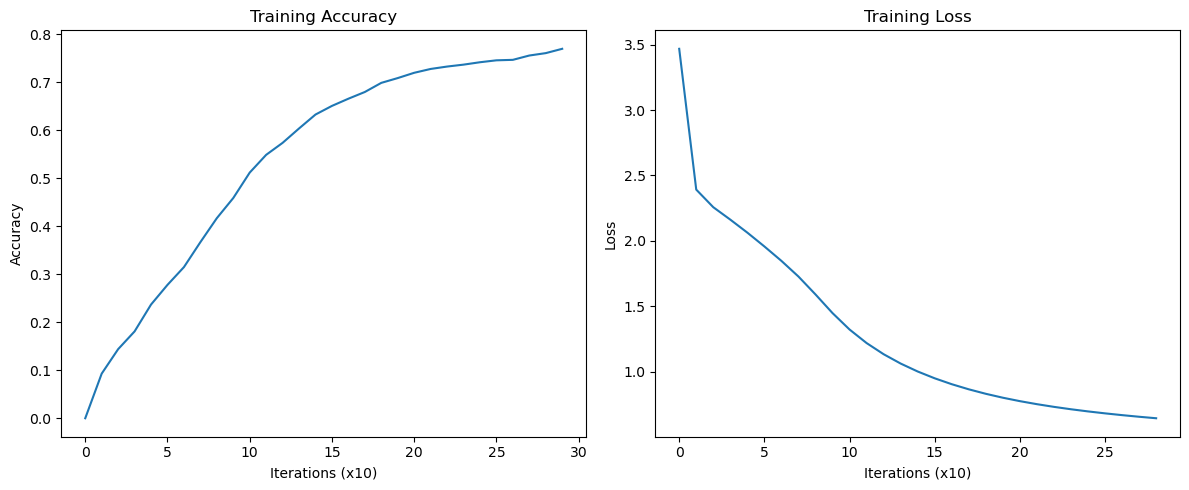

Iteration: 290
Accuracy:  0.777
Loss:  0.6330501233337459


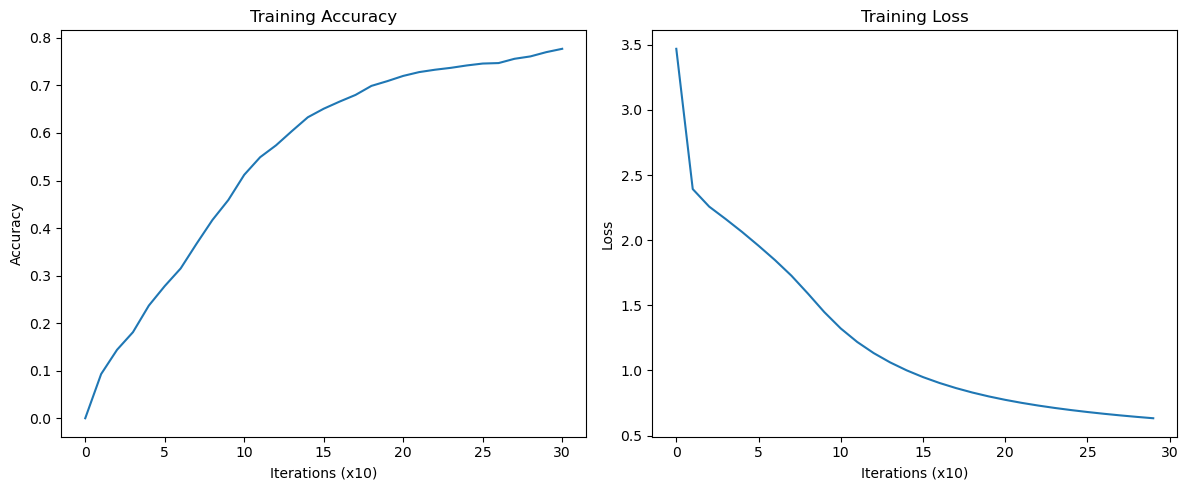

Iteration: 300
Accuracy:  0.785
Loss:  0.6233134873712399


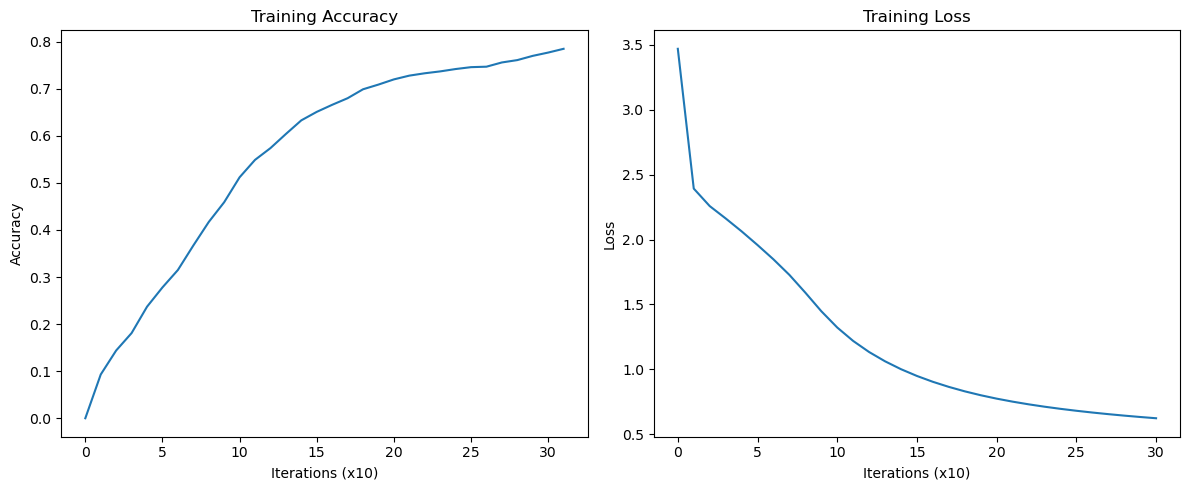

Iteration: 310
Accuracy:  0.792
Loss:  0.6142657021823292


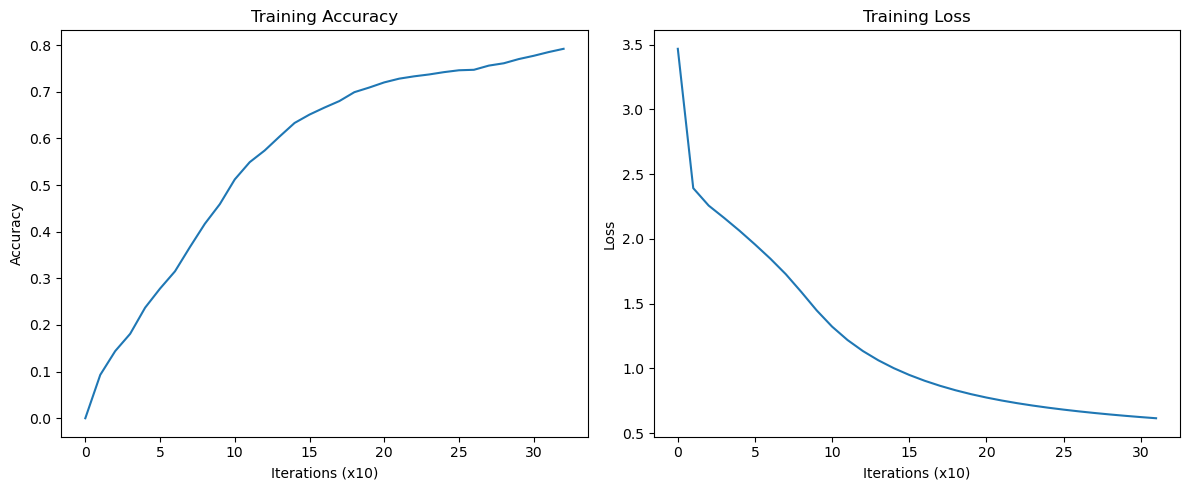

Iteration: 320
Accuracy:  0.795
Loss:  0.6058291016741918


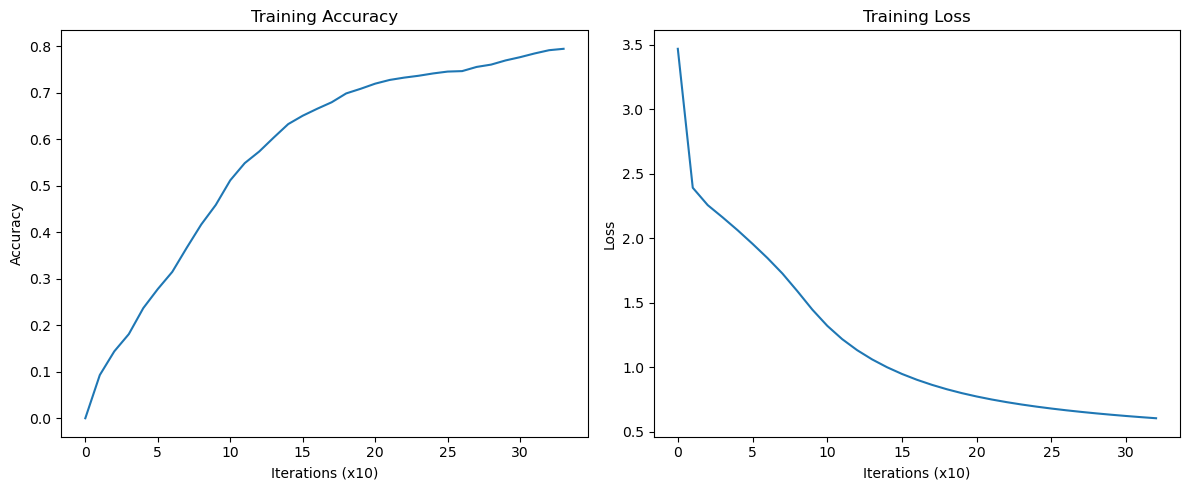

Iteration: 330
Accuracy:  0.801
Loss:  0.5979376812077997


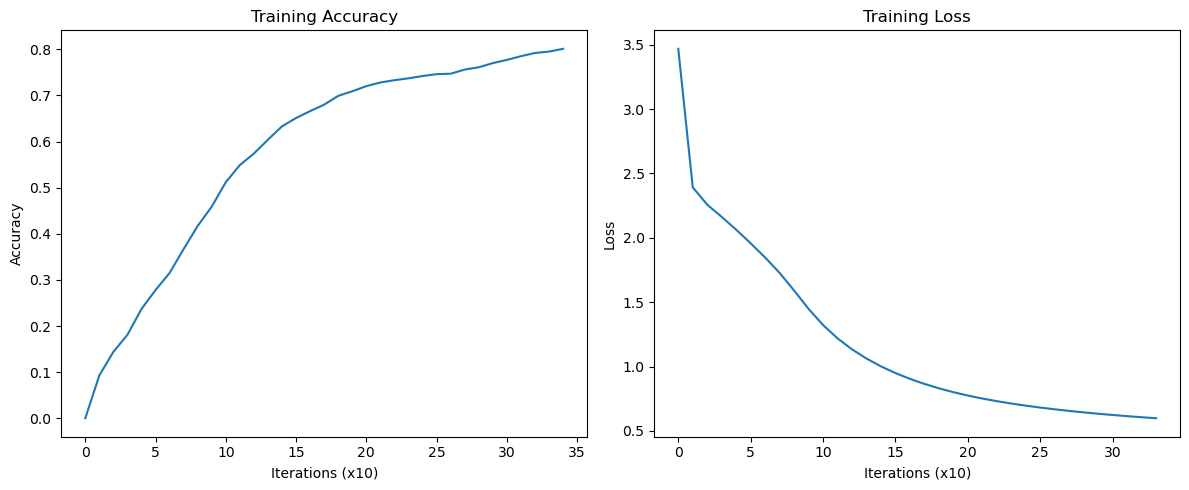

Iteration: 340
Accuracy:  0.803
Loss:  0.5905466957447406


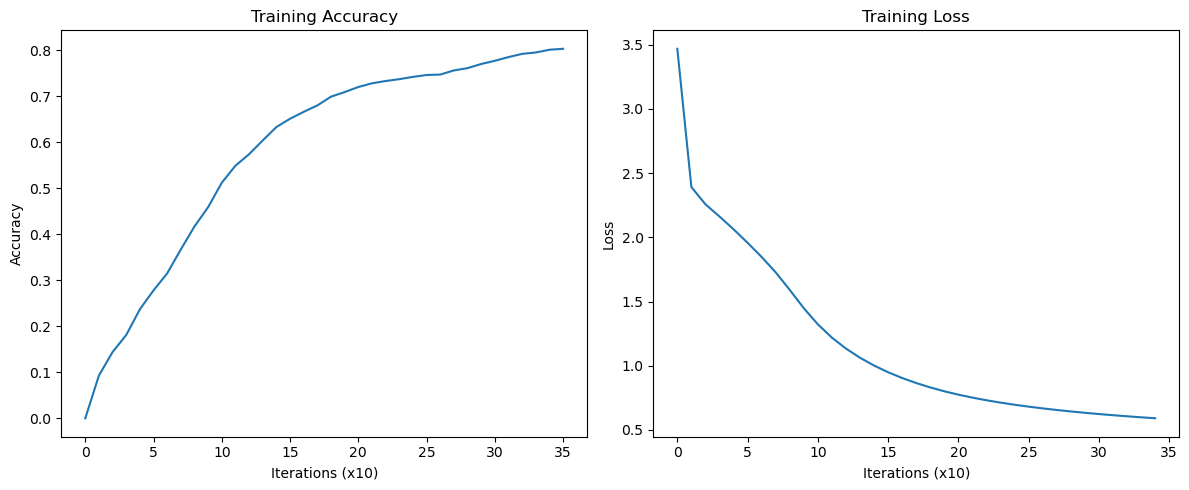

Iteration: 350
Accuracy:  0.804
Loss:  0.5836020964437314


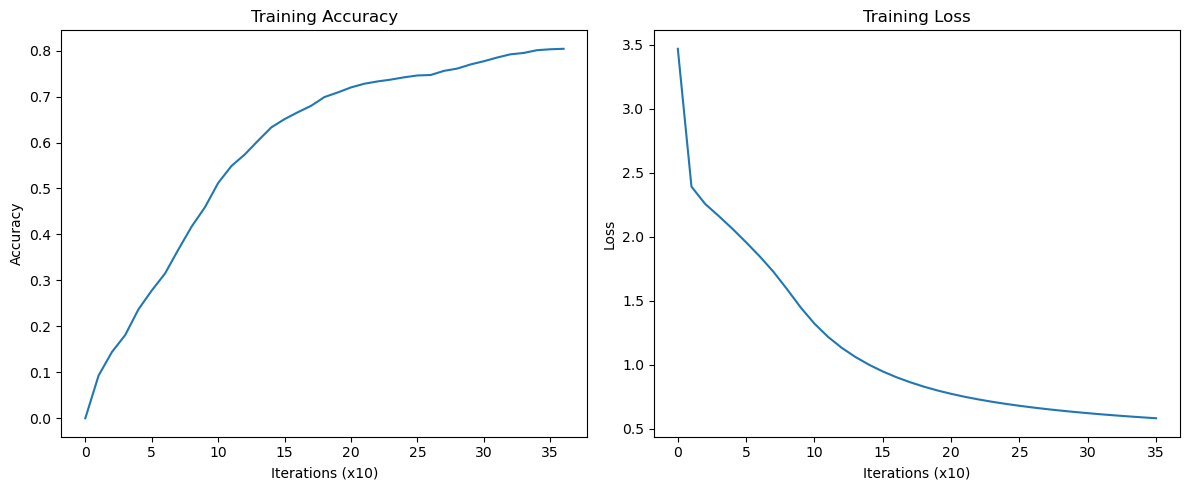

Iteration: 360
Accuracy:  0.804
Loss:  0.5770433387272845


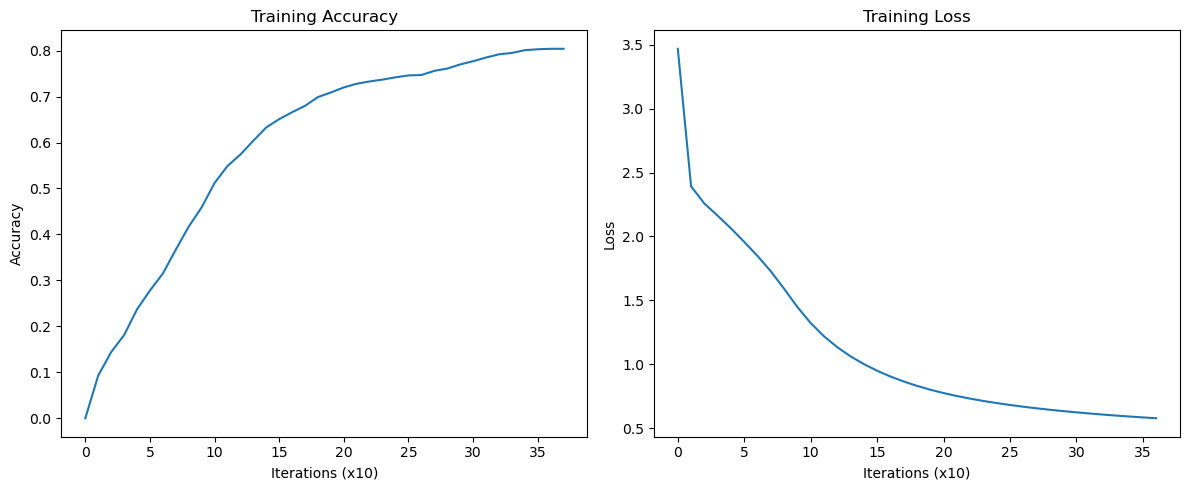

Iteration: 370
Accuracy:  0.807
Loss:  0.5708386783823484


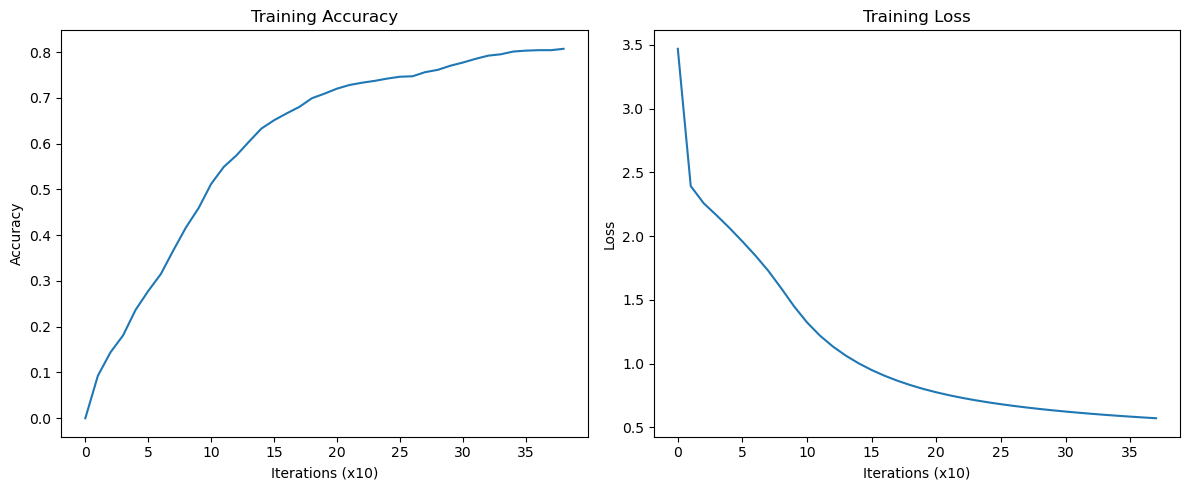

Iteration: 380
Accuracy:  0.809
Loss:  0.5649586597740397


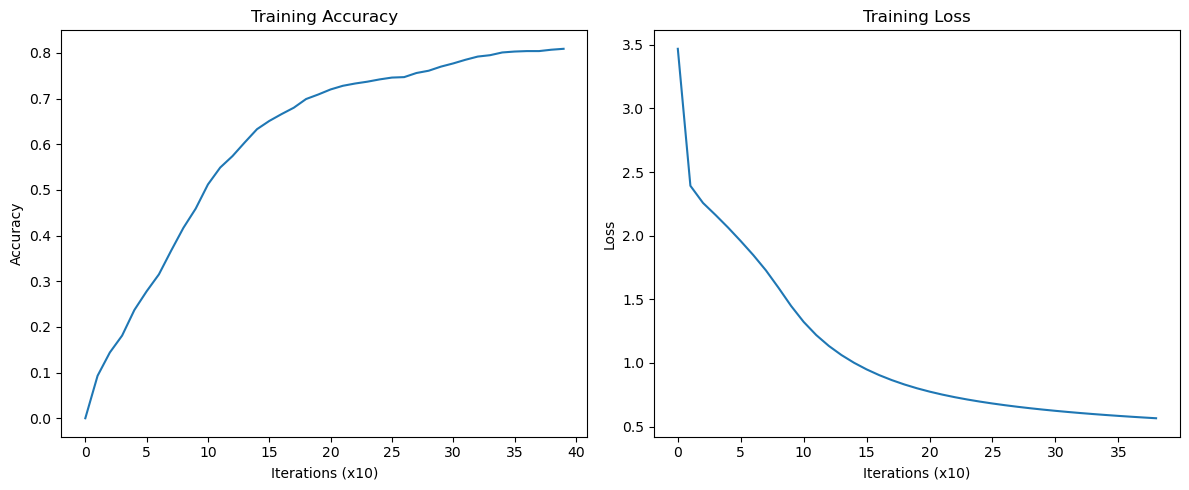

Iteration: 390
Accuracy:  0.812
Loss:  0.5593680461312027


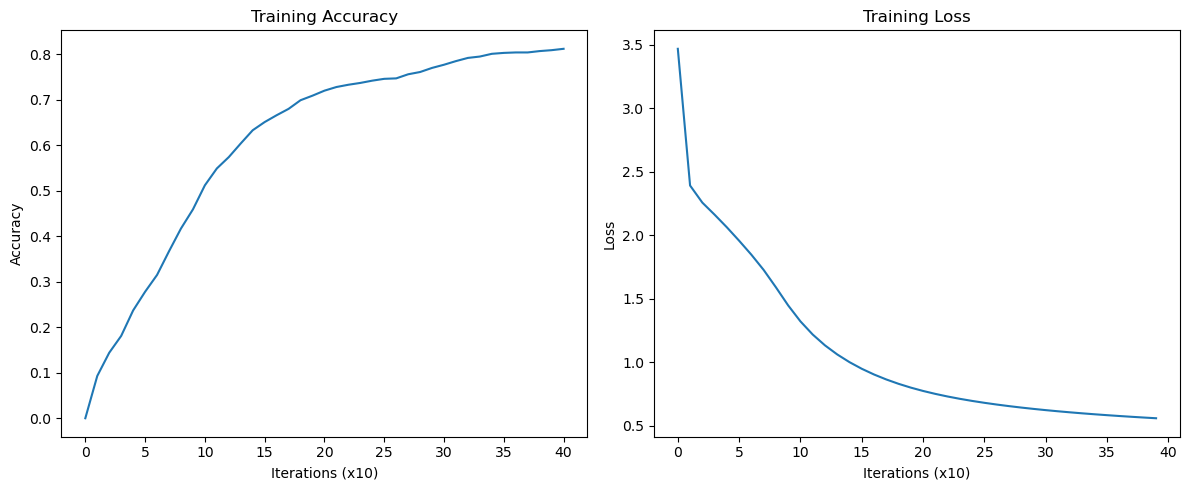

Iteration: 400
Accuracy:  0.815
Loss:  0.5540446902717554


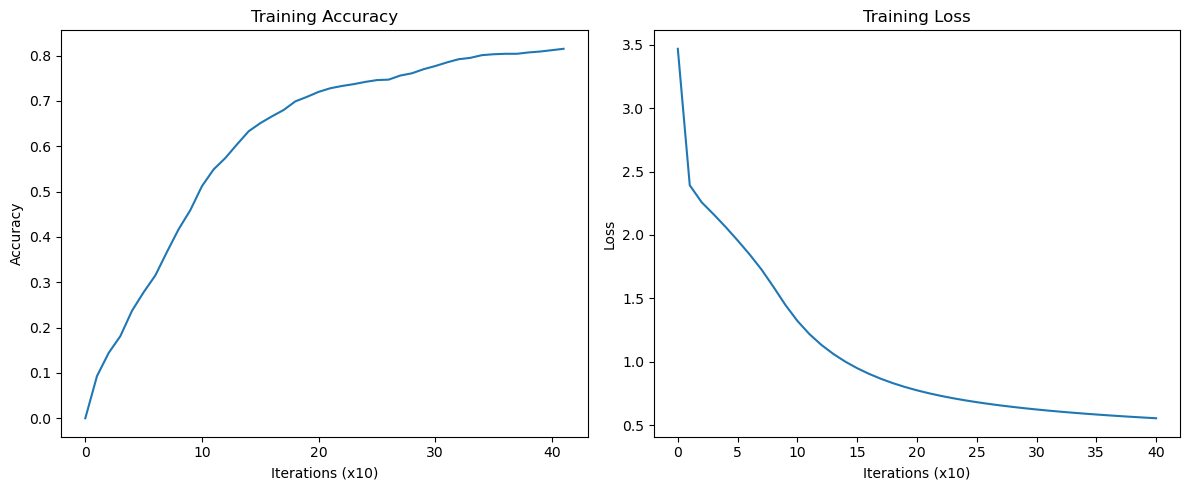

Iteration: 410
Accuracy:  0.817
Loss:  0.5489601785692523


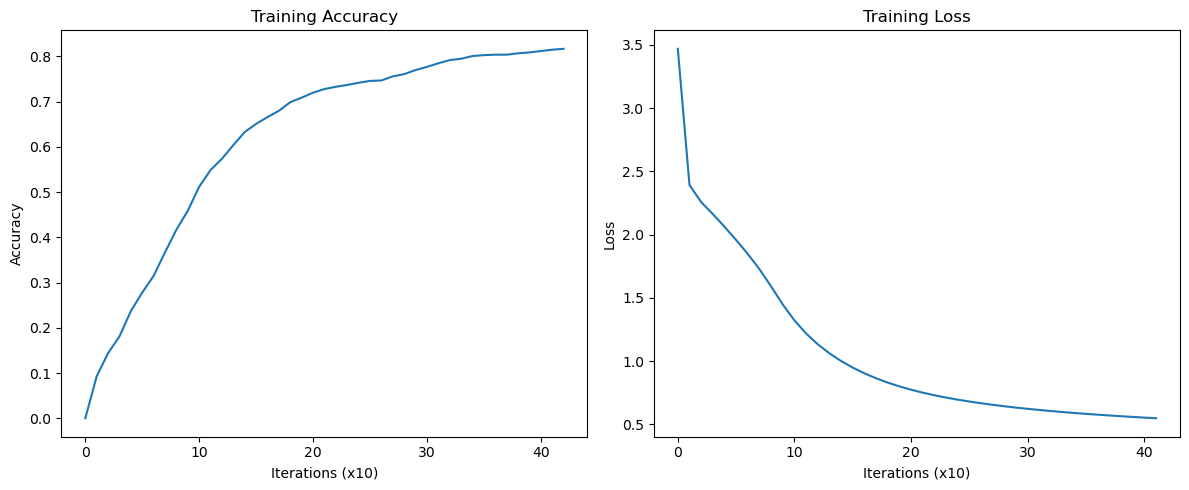

Iteration: 420
Accuracy:  0.821
Loss:  0.5440923557420757


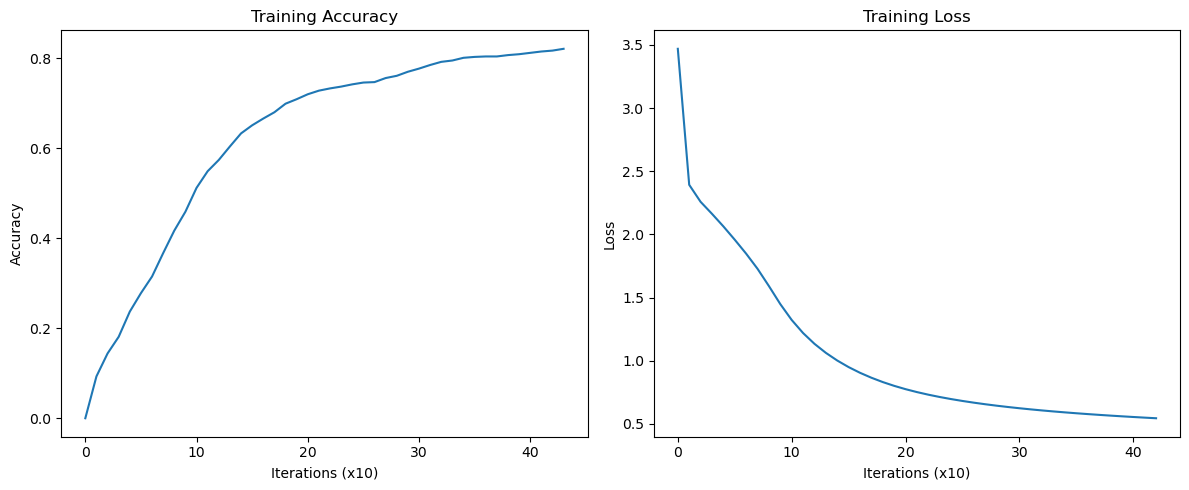

Iteration: 430
Accuracy:  0.82
Loss:  0.5394227921796041


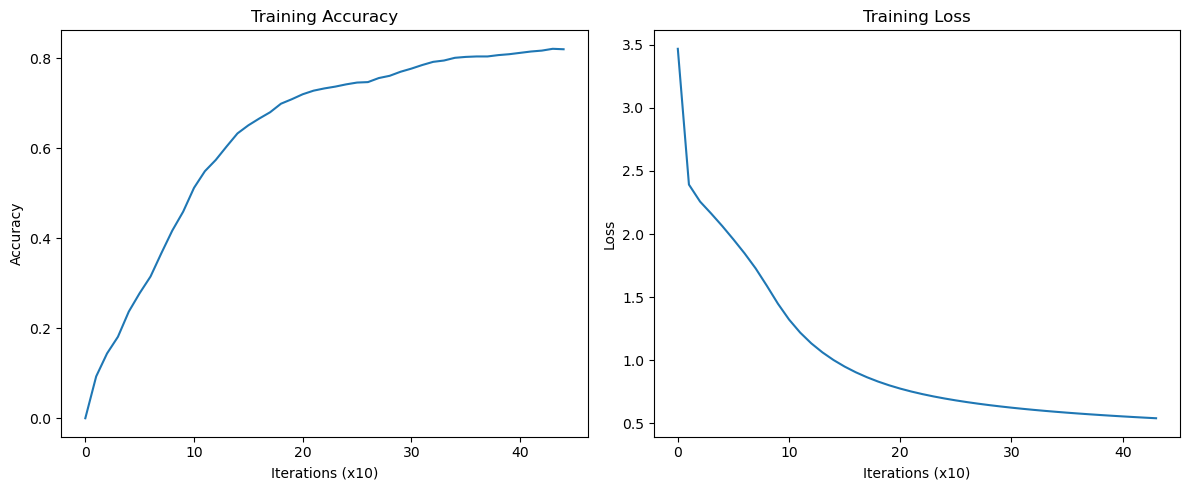

Iteration: 440
Accuracy:  0.82
Loss:  0.5349406424088982


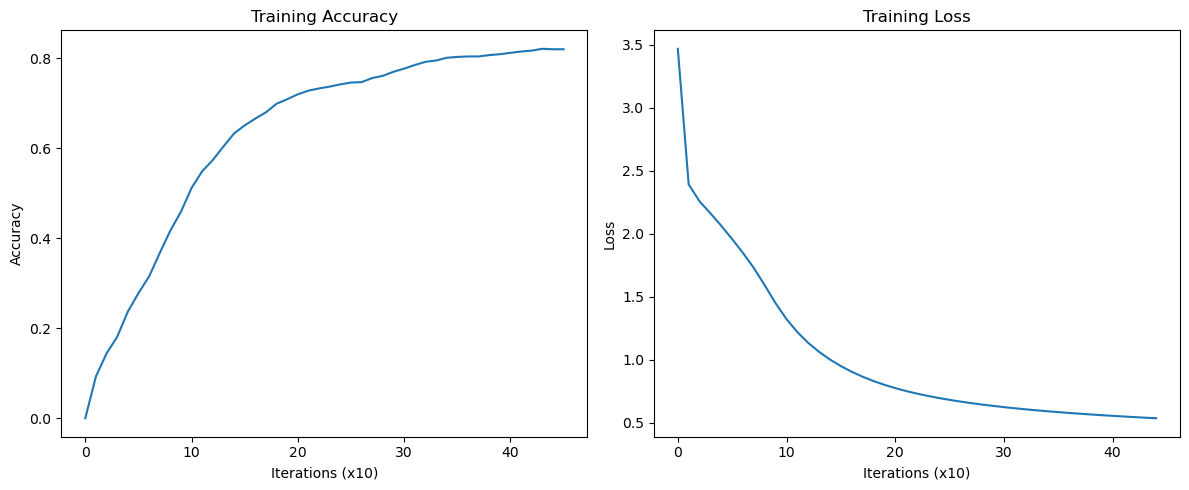

Iteration: 450
Accuracy:  0.821
Loss:  0.5306287264811044


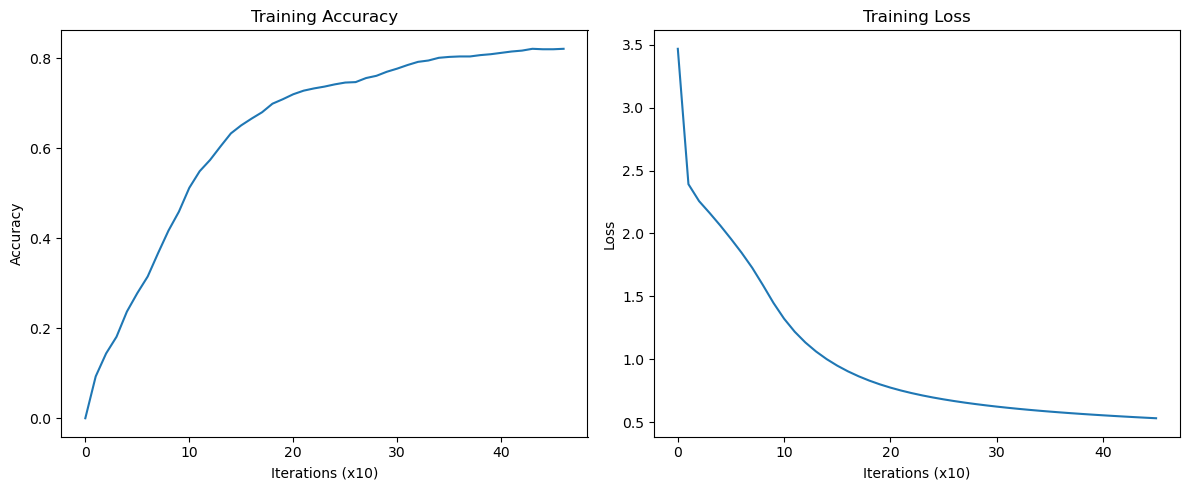

Iteration: 460
Accuracy:  0.822
Loss:  0.5264850654031457


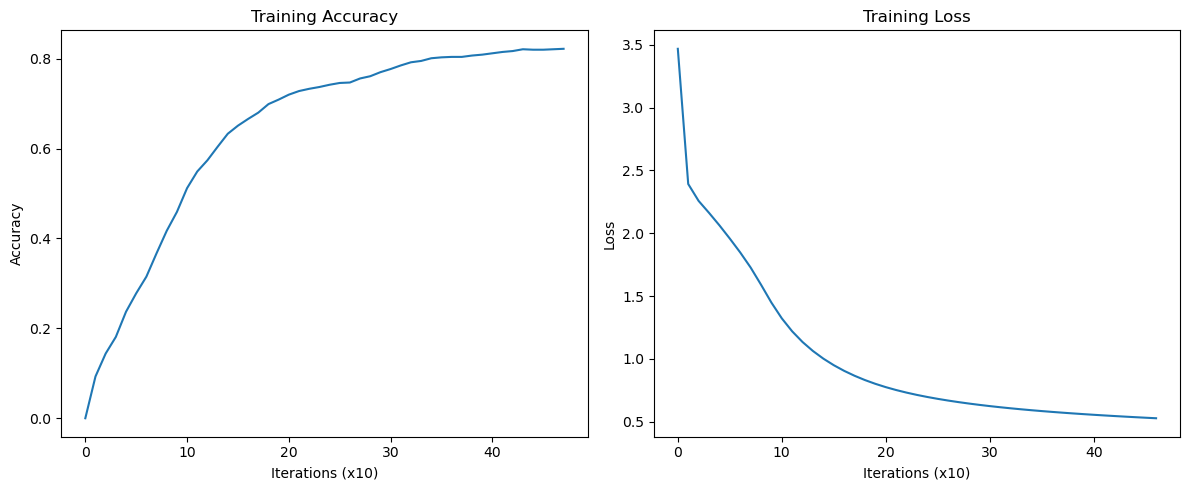

Iteration: 470
Accuracy:  0.823
Loss:  0.5225000705327987


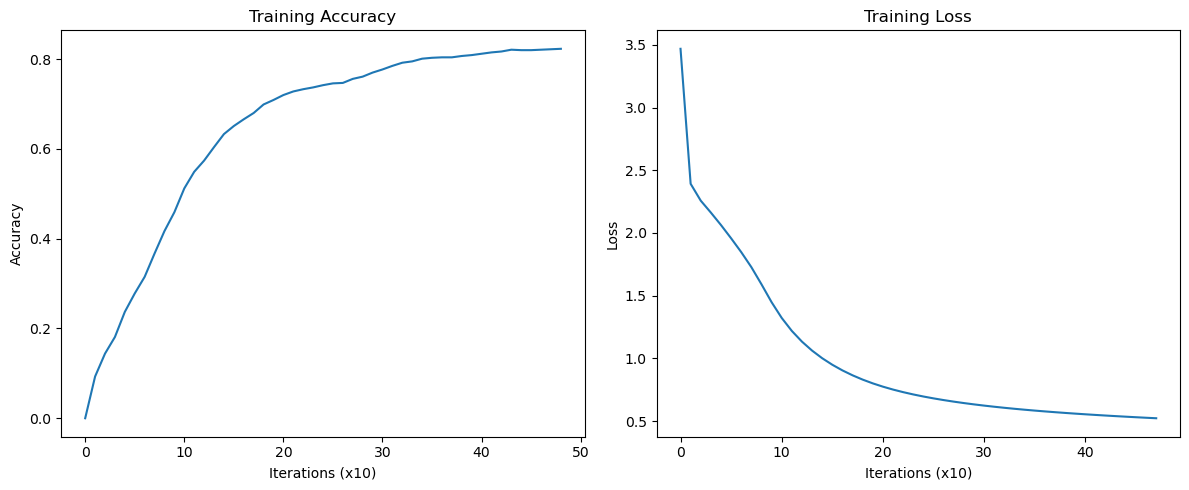

Iteration: 480
Accuracy:  0.824
Loss:  0.518659886135559


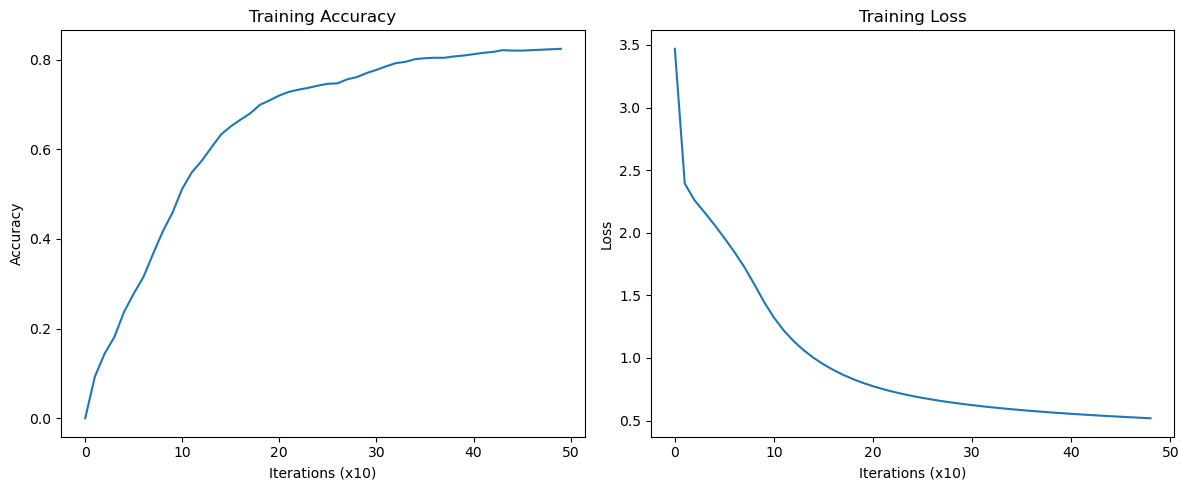

Iteration: 490
Accuracy:  0.825
Loss:  0.5149603531806163


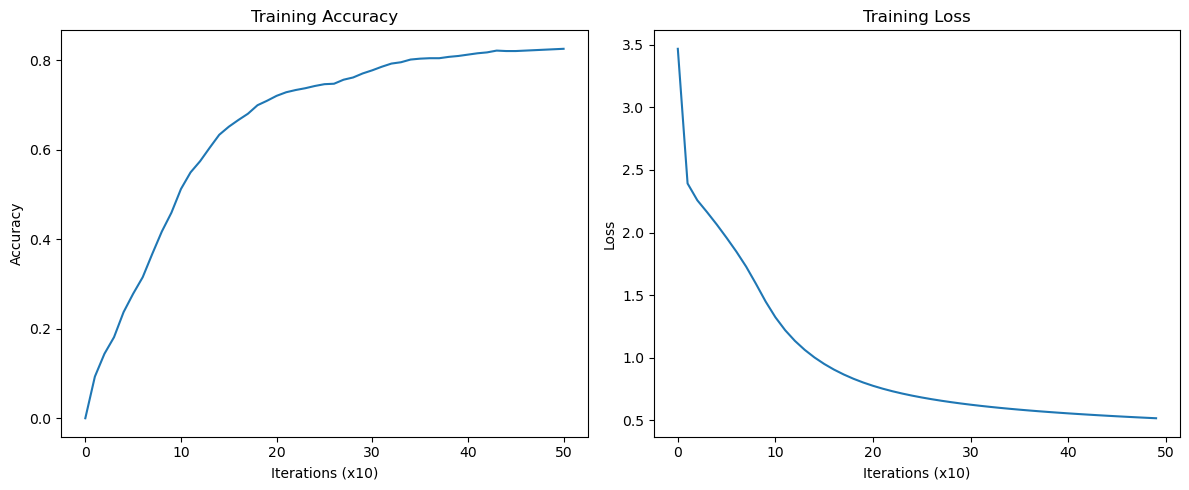

Iteration: 500
Accuracy:  0.826
Loss:  0.5113939433738143


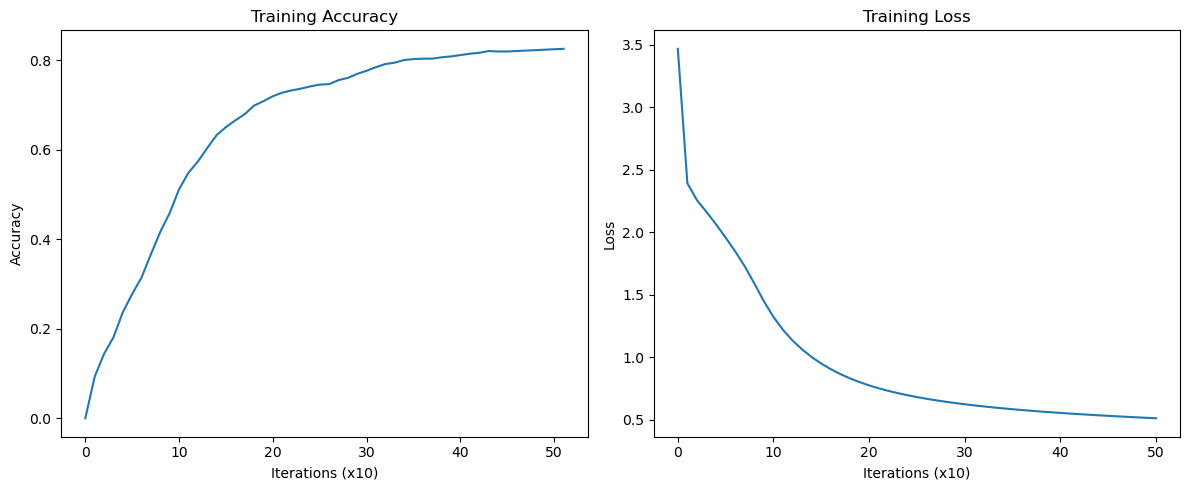

Iteration: 510
Accuracy:  0.828
Loss:  0.507948097313173


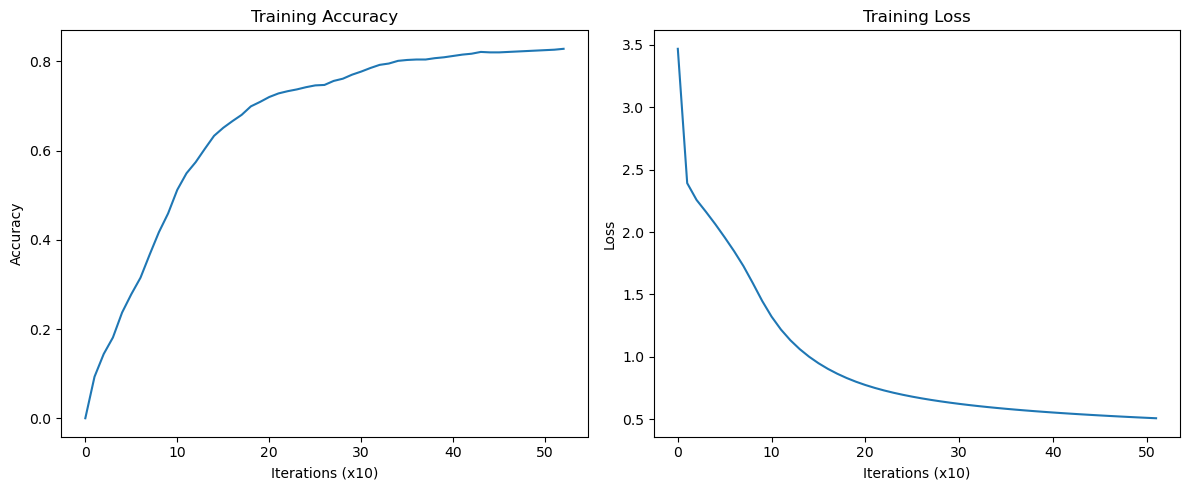

Iteration: 520
Accuracy:  0.831
Loss:  0.5046126017402823


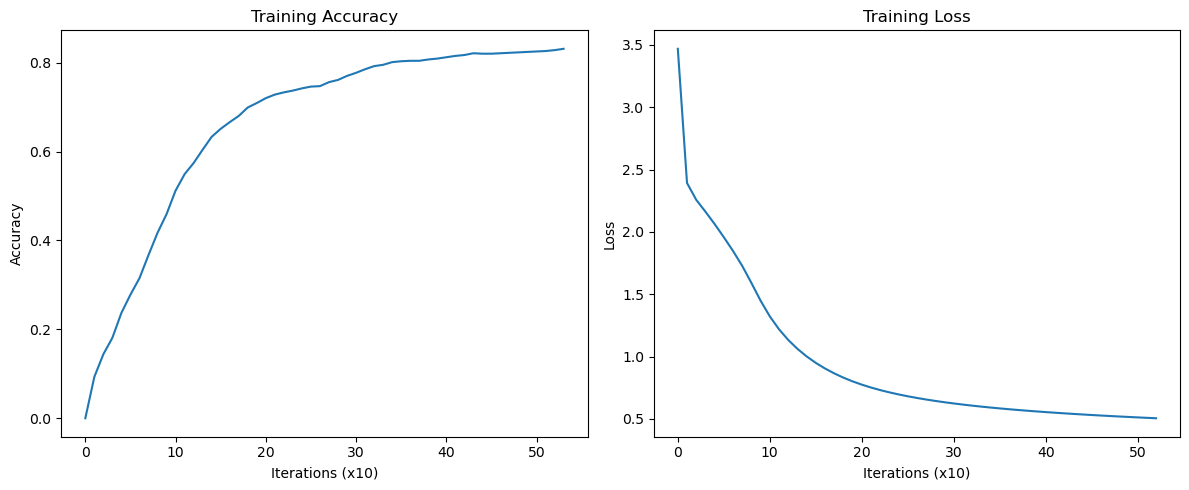

Iteration: 530
Accuracy:  0.832
Loss:  0.5013773863624136


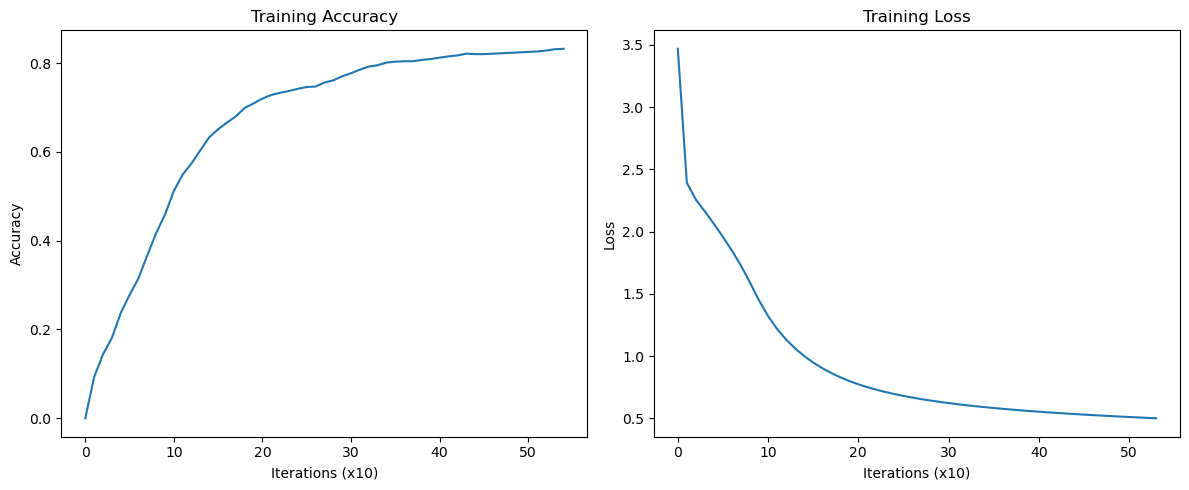

Iteration: 540
Accuracy:  0.833
Loss:  0.49823607144668064


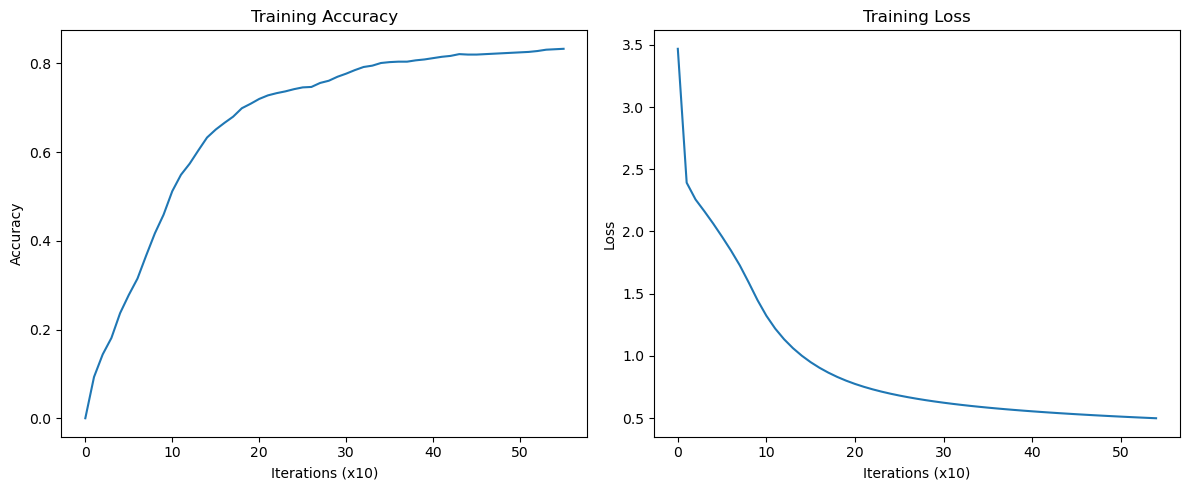

Iteration: 550
Accuracy:  0.834
Loss:  0.49518638936584775


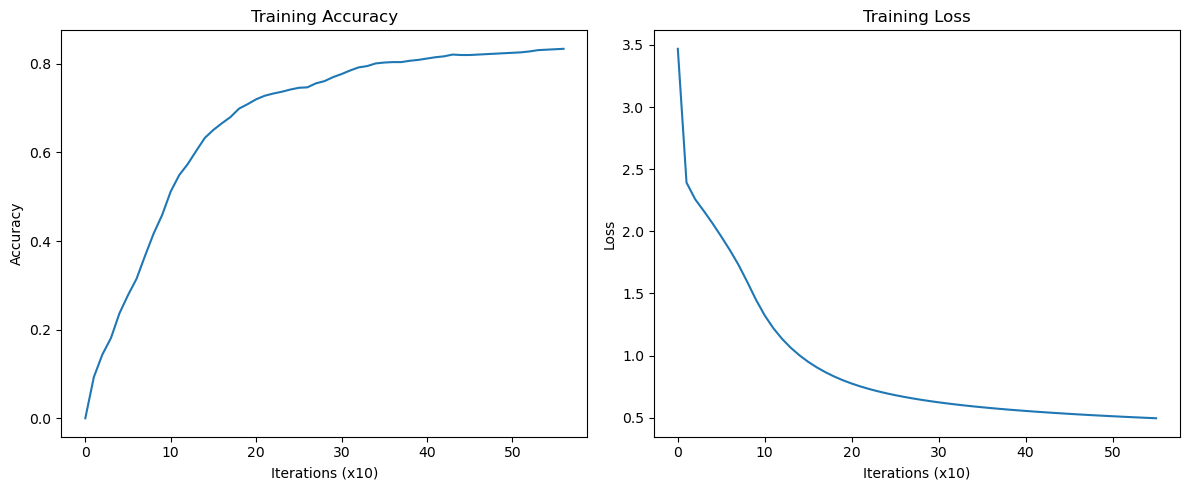

Iteration: 560
Accuracy:  0.836
Loss:  0.49222388943337725


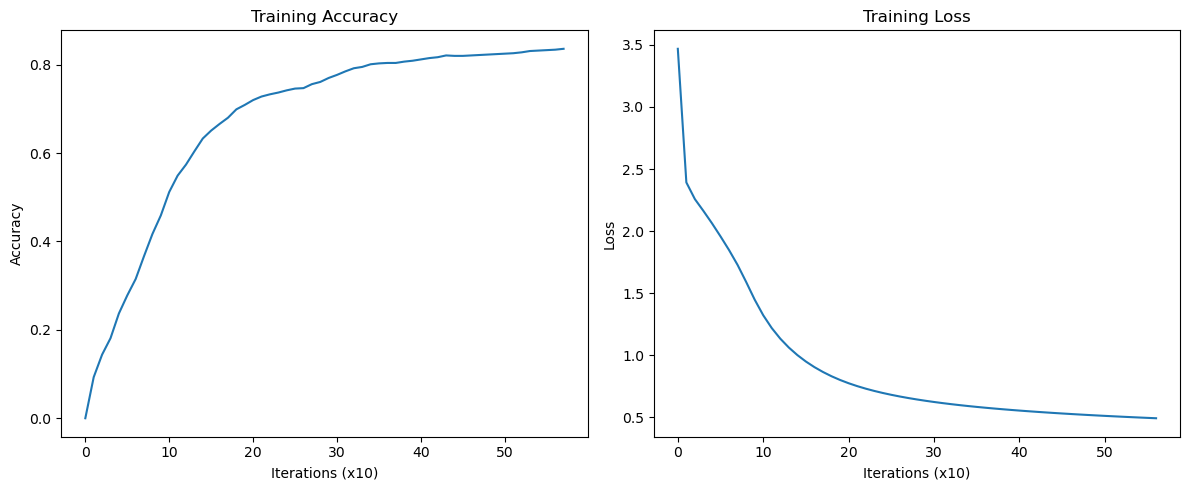

Iteration: 570
Accuracy:  0.838
Loss:  0.48934239668848845


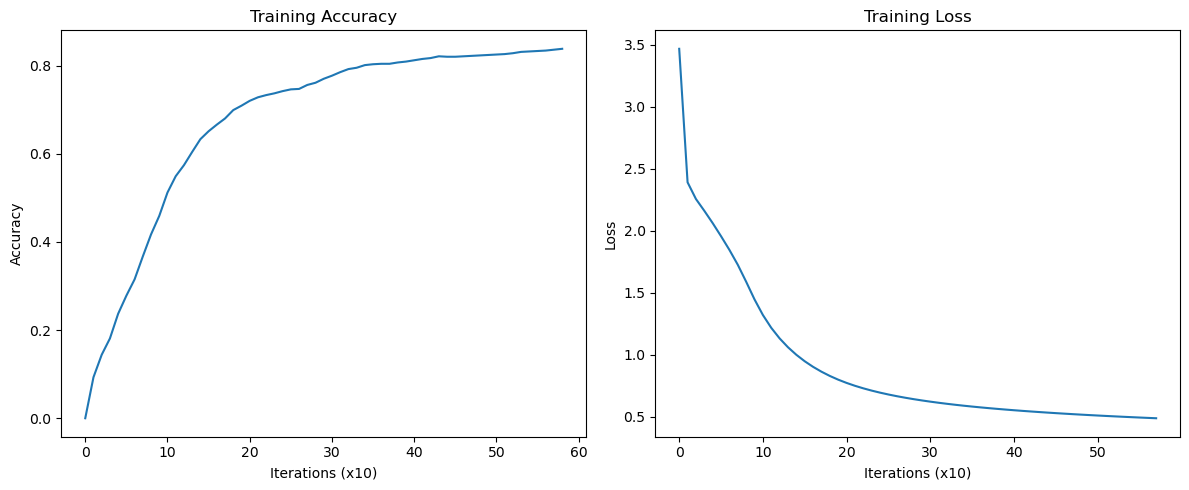

Iteration: 580
Accuracy:  0.84
Loss:  0.48654282128217385


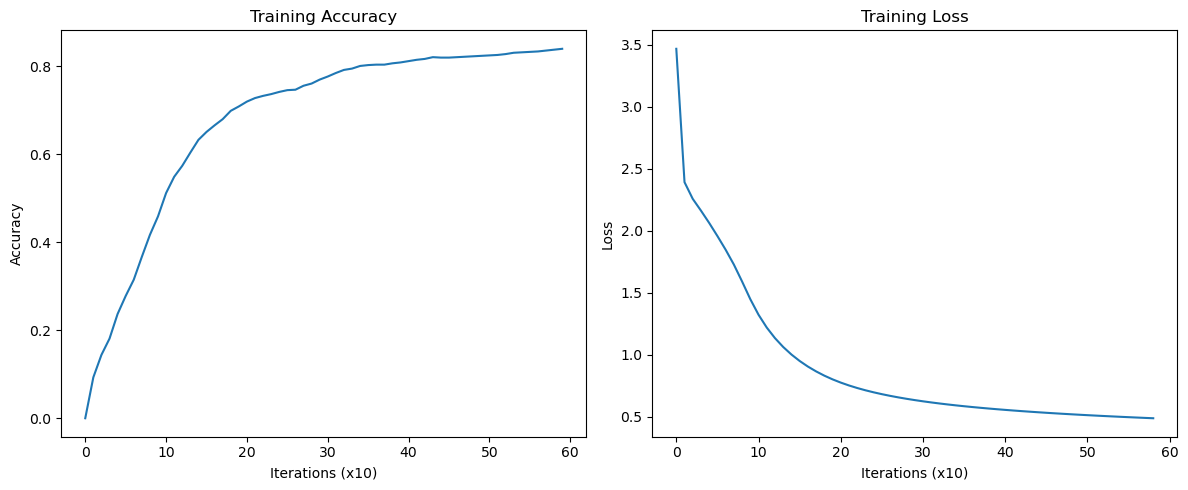

Iteration: 590
Accuracy:  0.842
Loss:  0.4838127558268301


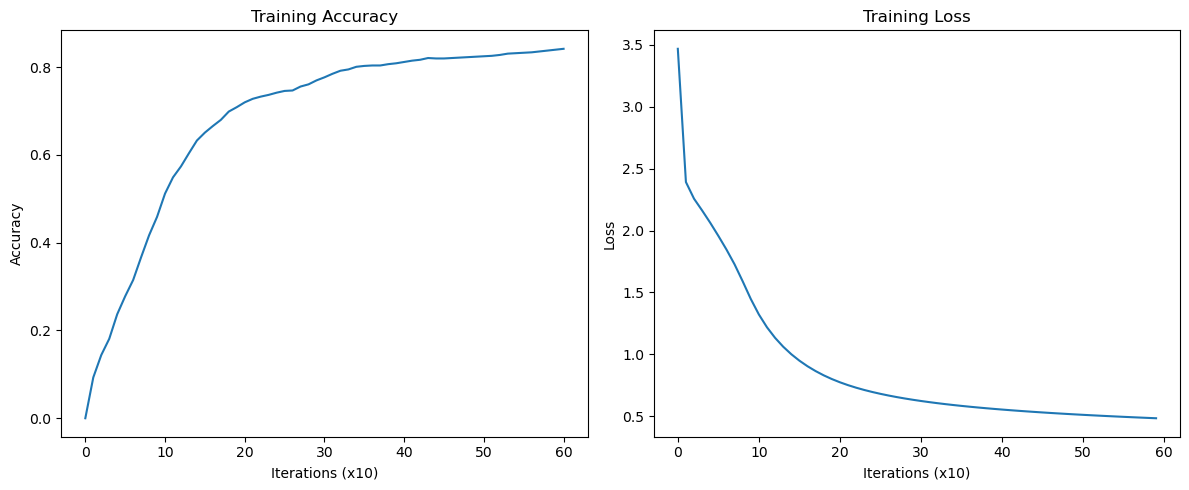

Iteration: 600
Accuracy:  0.843
Loss:  0.48114955114942626


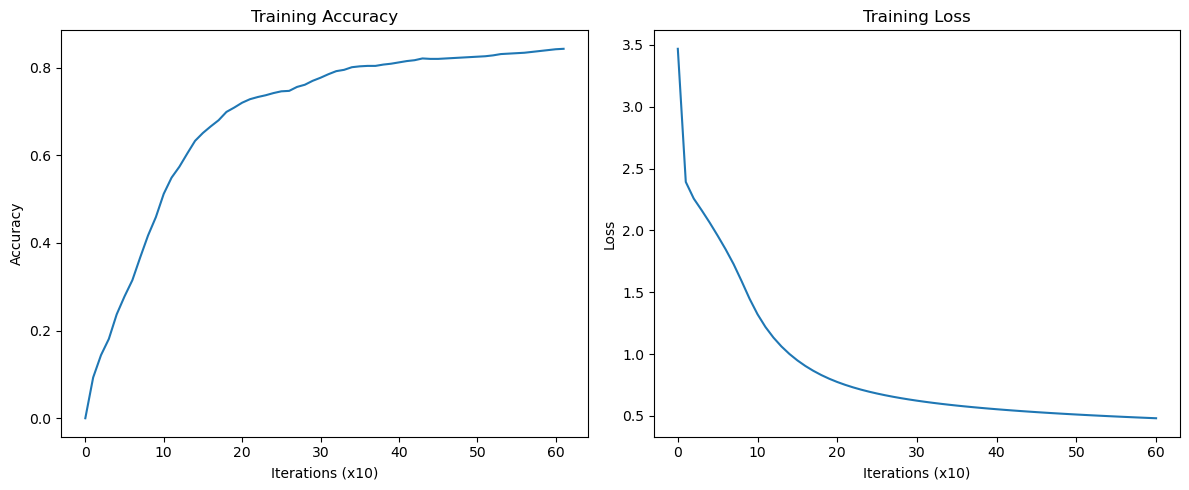

Iteration: 610
Accuracy:  0.843
Loss:  0.4785547800086388


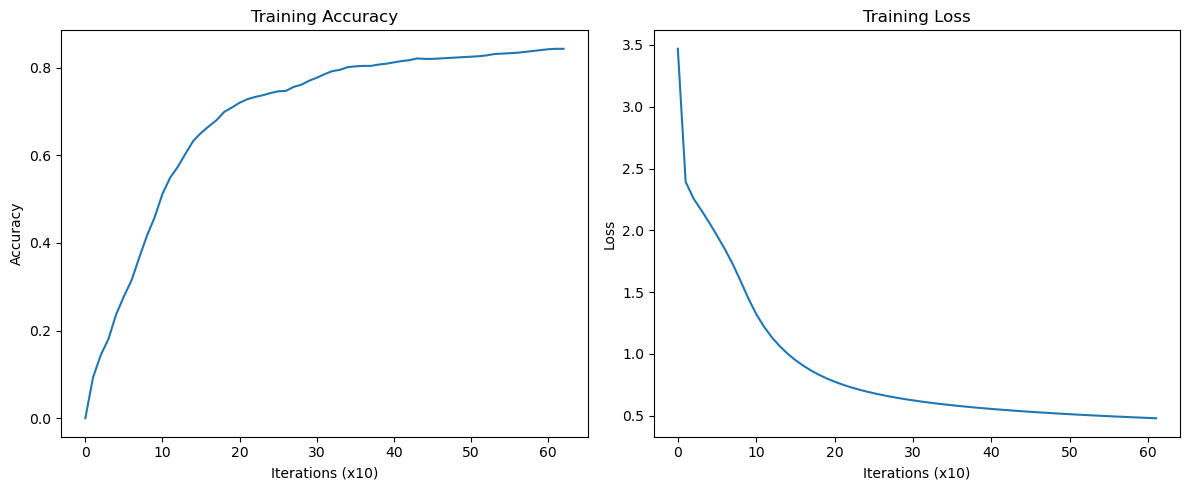

Iteration: 620
Accuracy:  0.844
Loss:  0.47601829945551466


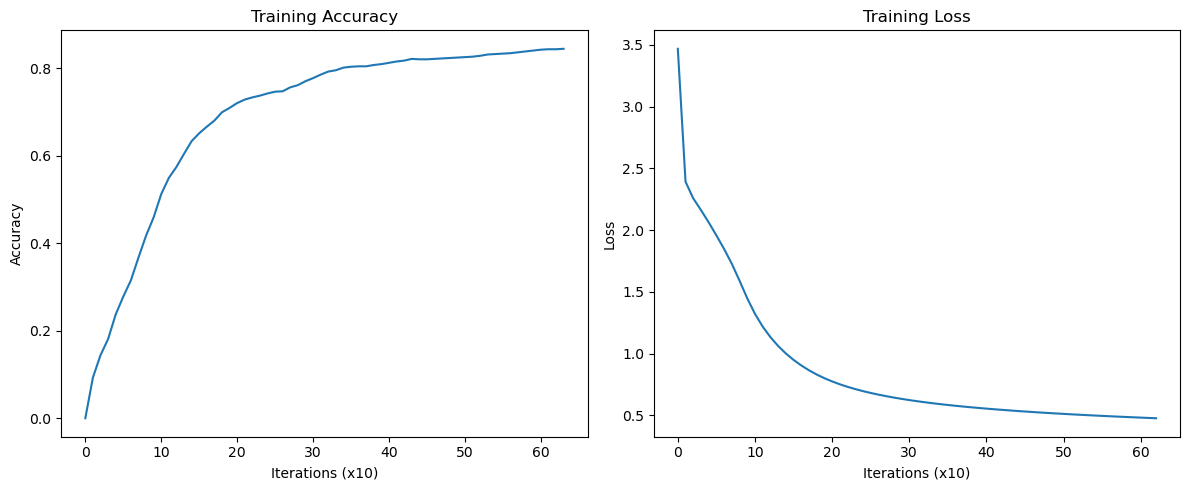

Iteration: 630
Accuracy:  0.843
Loss:  0.47354751196205536


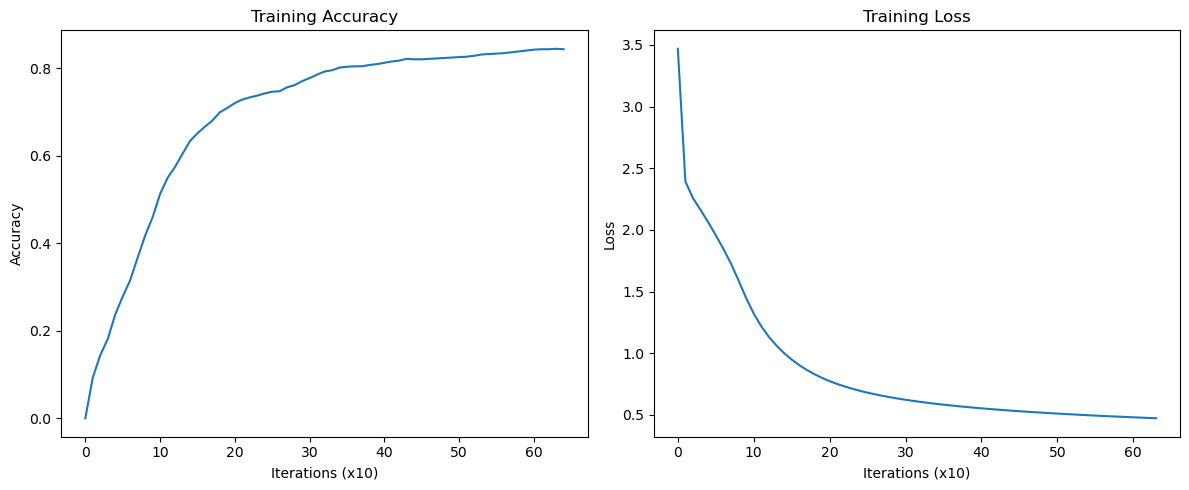

Iteration: 640
Accuracy:  0.843
Loss:  0.4711347412351687


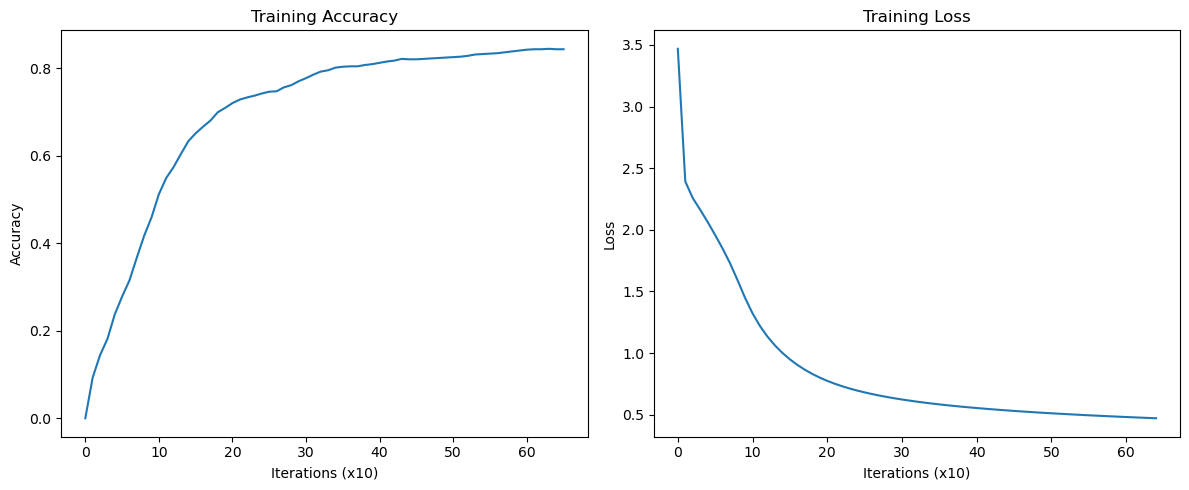

Iteration: 650
Accuracy:  0.844
Loss:  0.46877681498612905


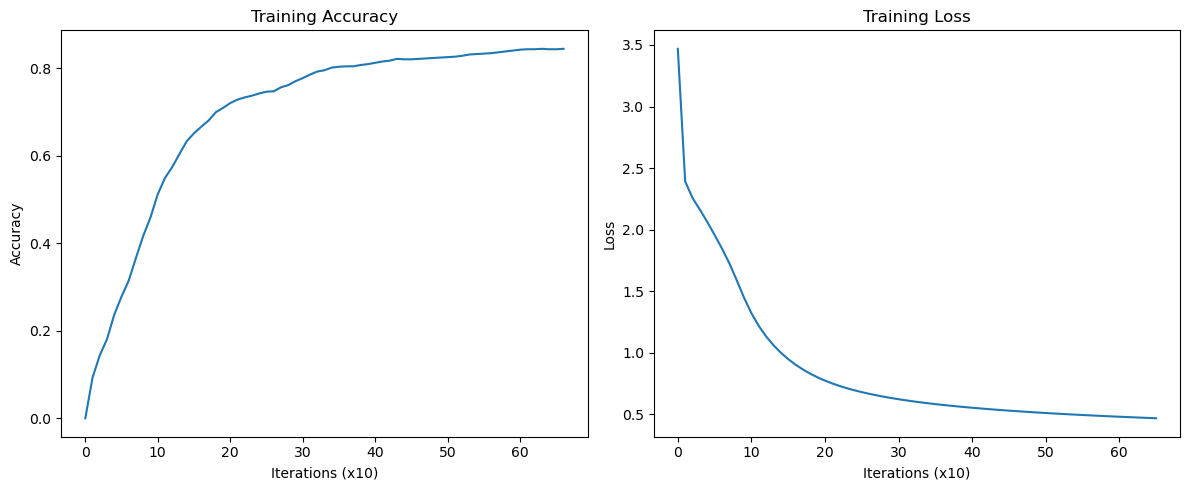

Iteration: 660
Accuracy:  0.844
Loss:  0.4664720307000277


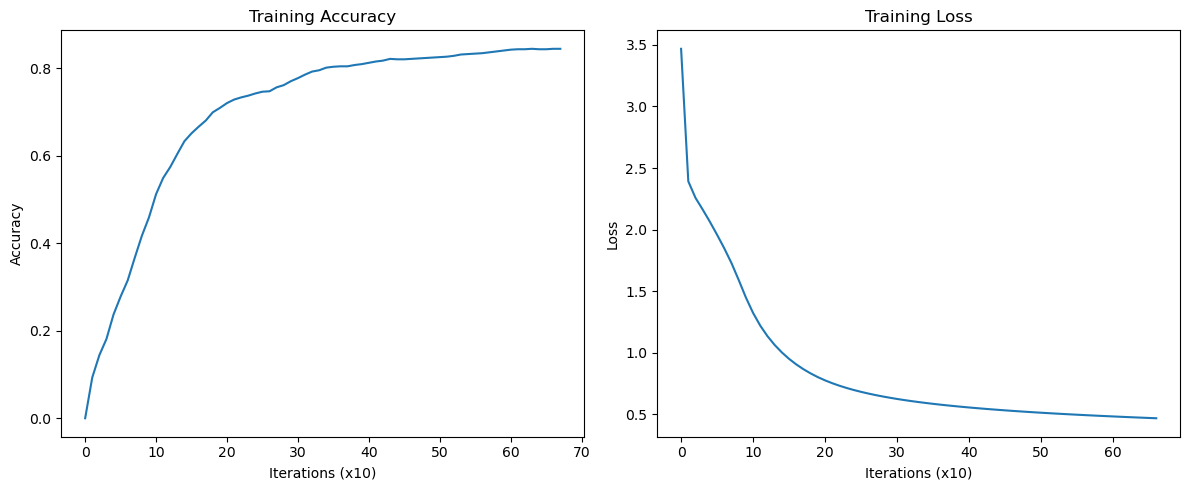

Iteration: 670
Accuracy:  0.845
Loss:  0.4642203859432491


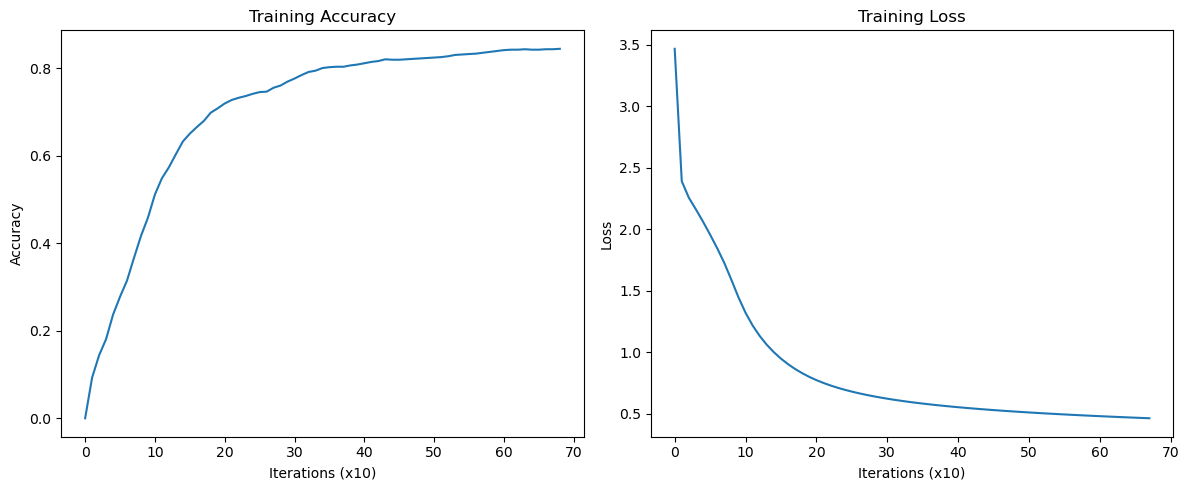

Iteration: 680
Accuracy:  0.845
Loss:  0.46202088690128085


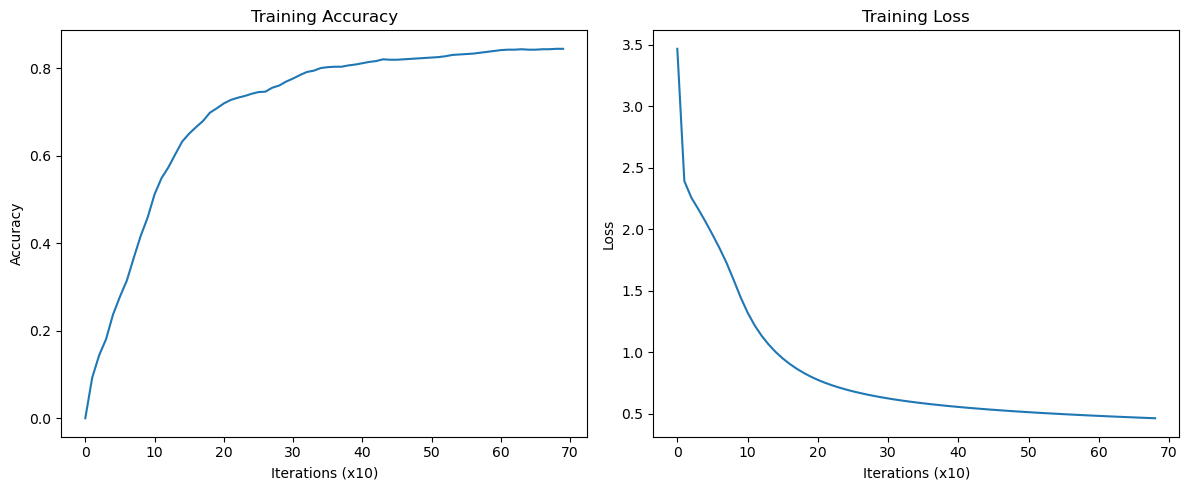

Iteration: 690
Accuracy:  0.846
Loss:  0.45987448918856344


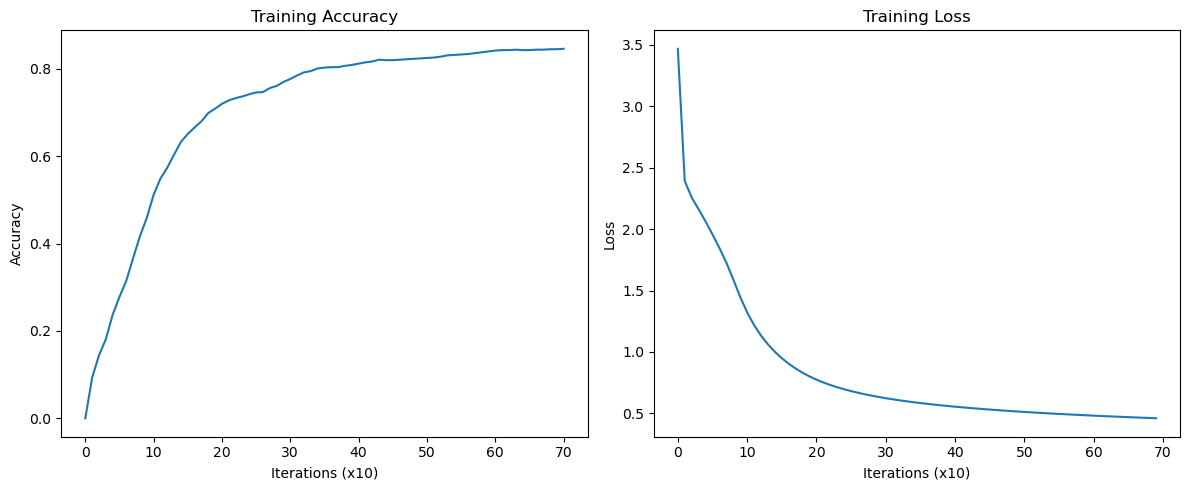

Iteration: 700
Accuracy:  0.85
Loss:  0.45777418433704986


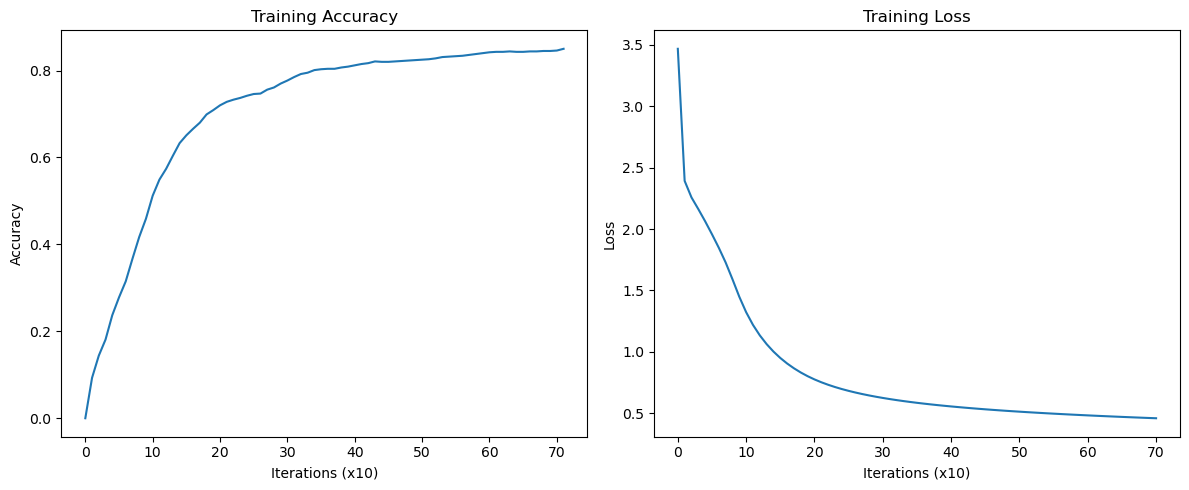

Iteration: 710
Accuracy:  0.85
Loss:  0.45572385533153964


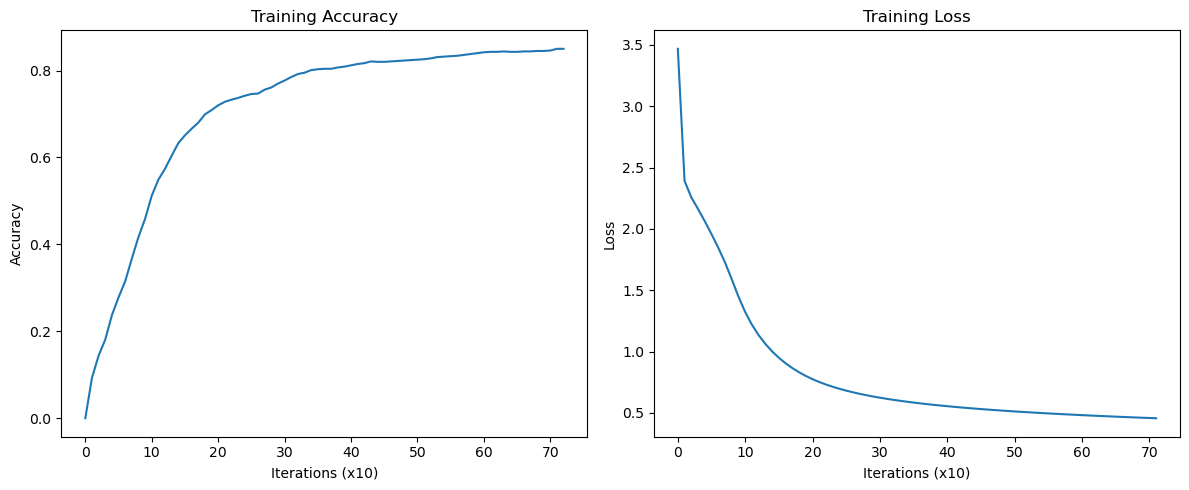

Iteration: 720
Accuracy:  0.85
Loss:  0.45371767185742795


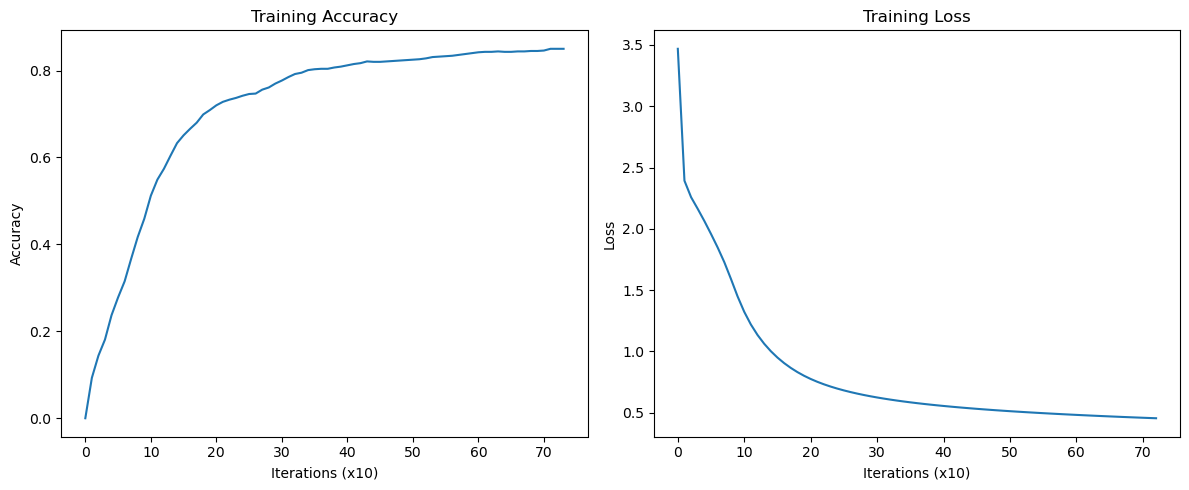

Iteration: 730
Accuracy:  0.85
Loss:  0.4517522223677289


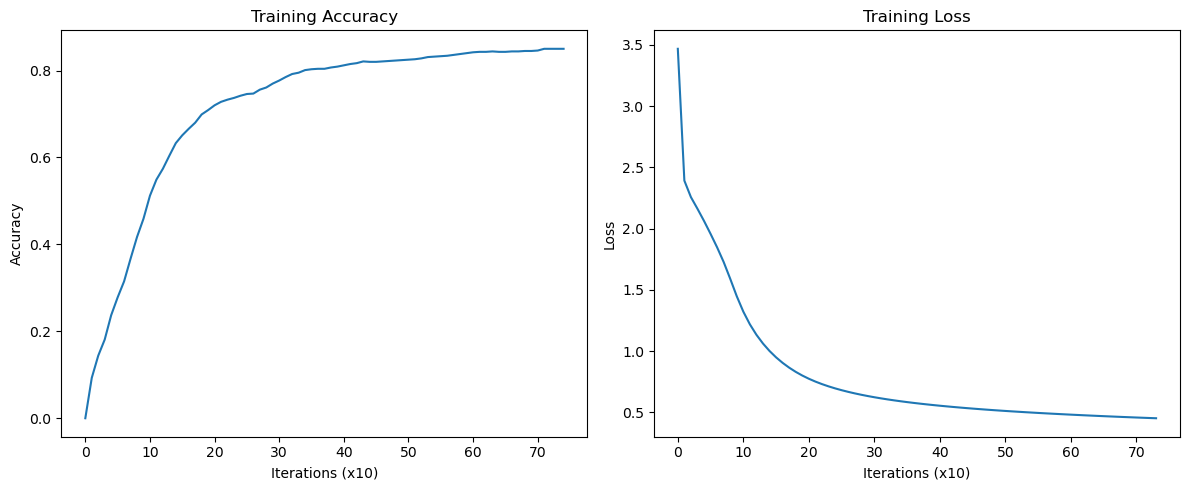

Iteration: 740
Accuracy:  0.852
Loss:  0.44982393796762843


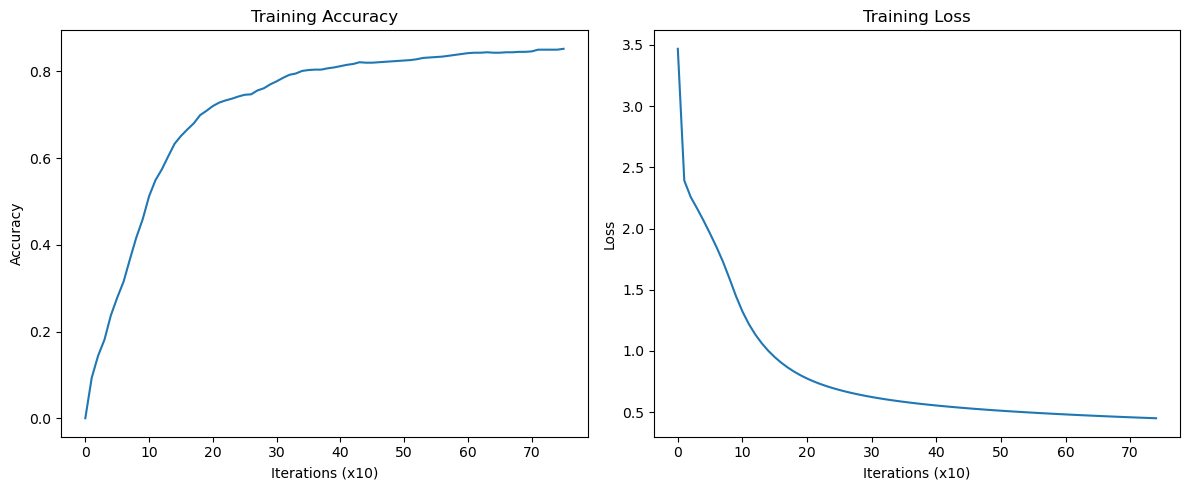

Iteration: 750
Accuracy:  0.851
Loss:  0.44793356419173946


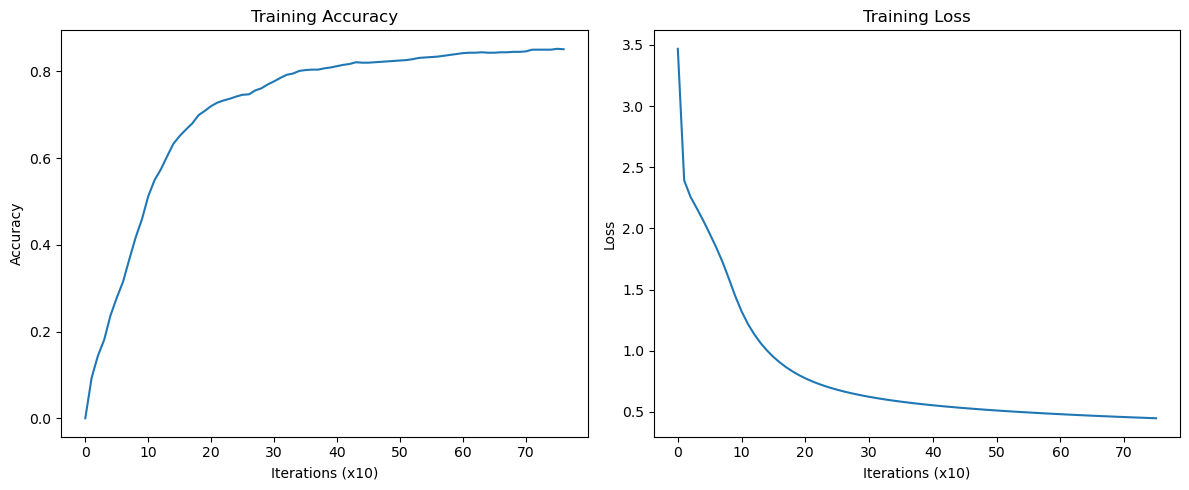

Iteration: 760
Accuracy:  0.853
Loss:  0.4460793272441976


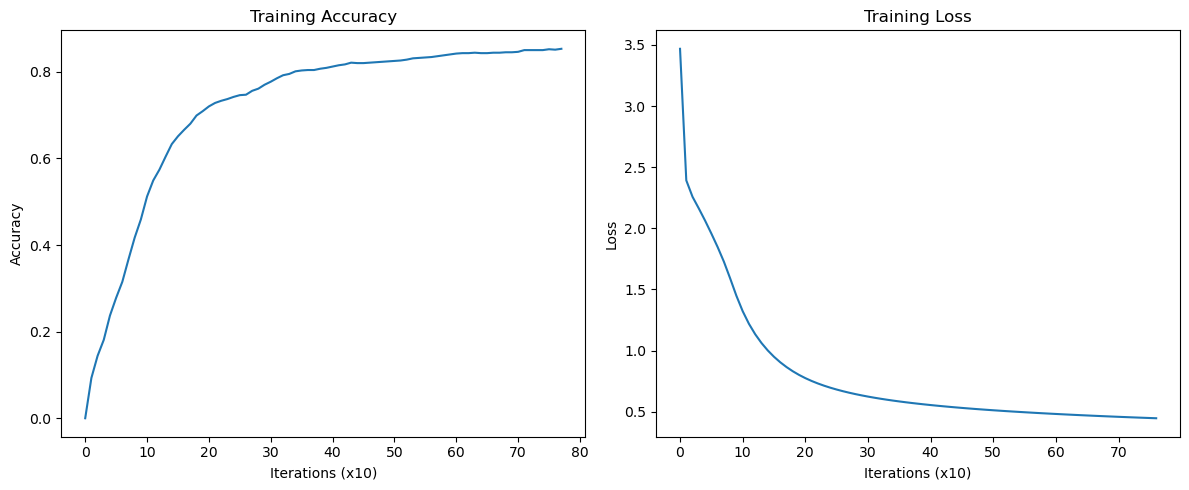

Iteration: 770
Accuracy:  0.855
Loss:  0.4442628853694703


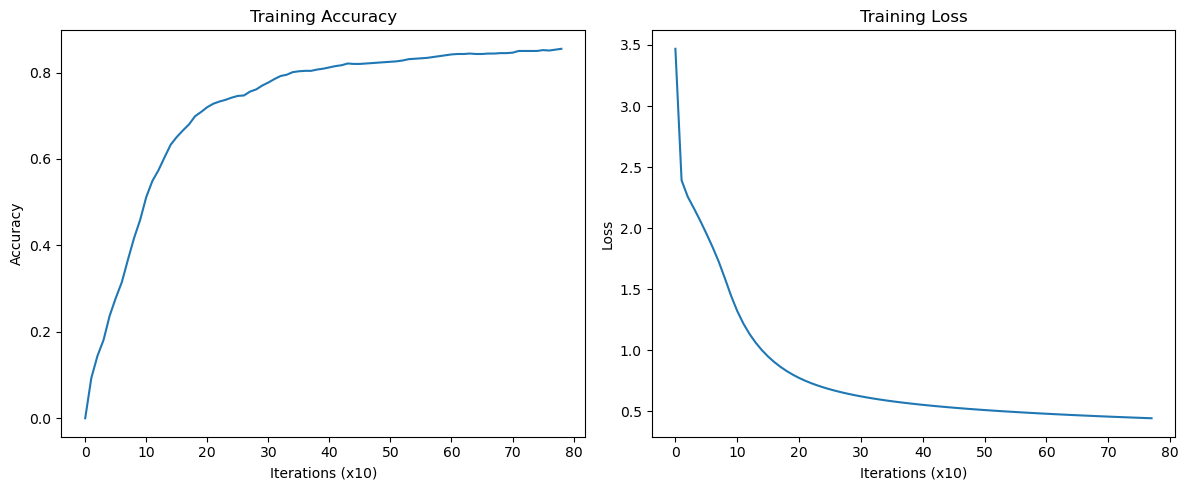

Iteration: 780
Accuracy:  0.856
Loss:  0.4424786731946112


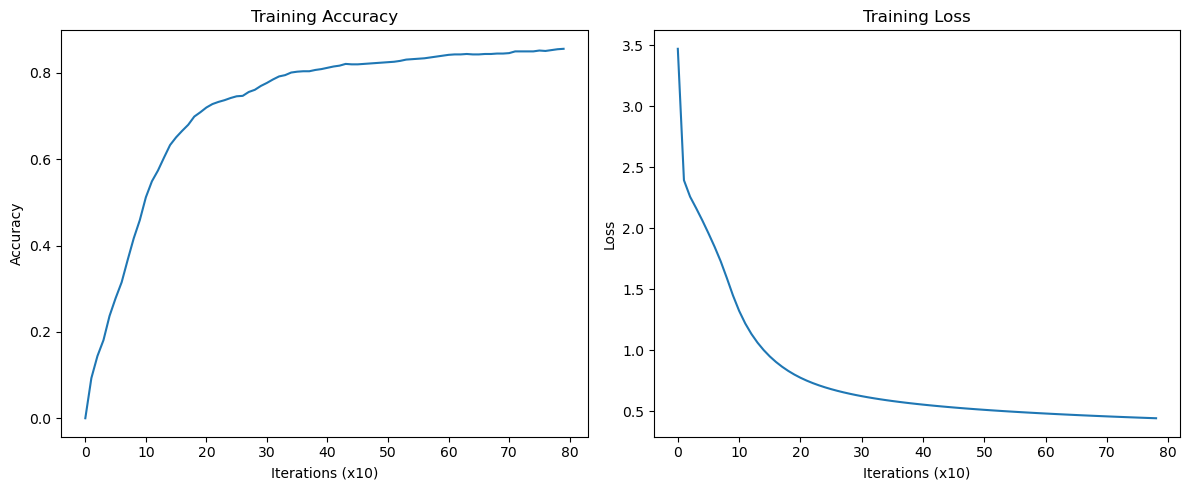

Iteration: 790
Accuracy:  0.856
Loss:  0.44072717419290786


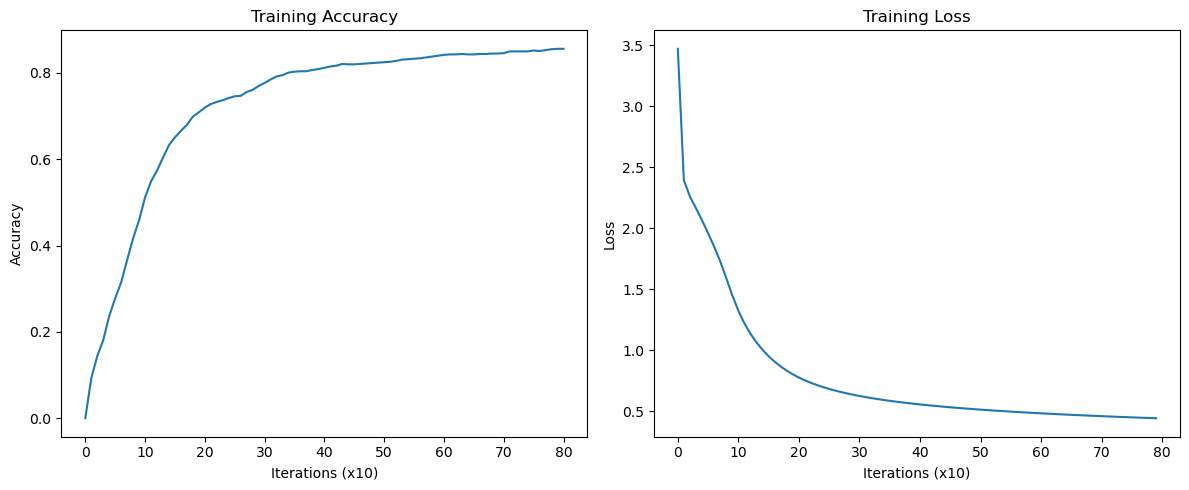

Iteration: 800
Accuracy:  0.856
Loss:  0.43900492482789727


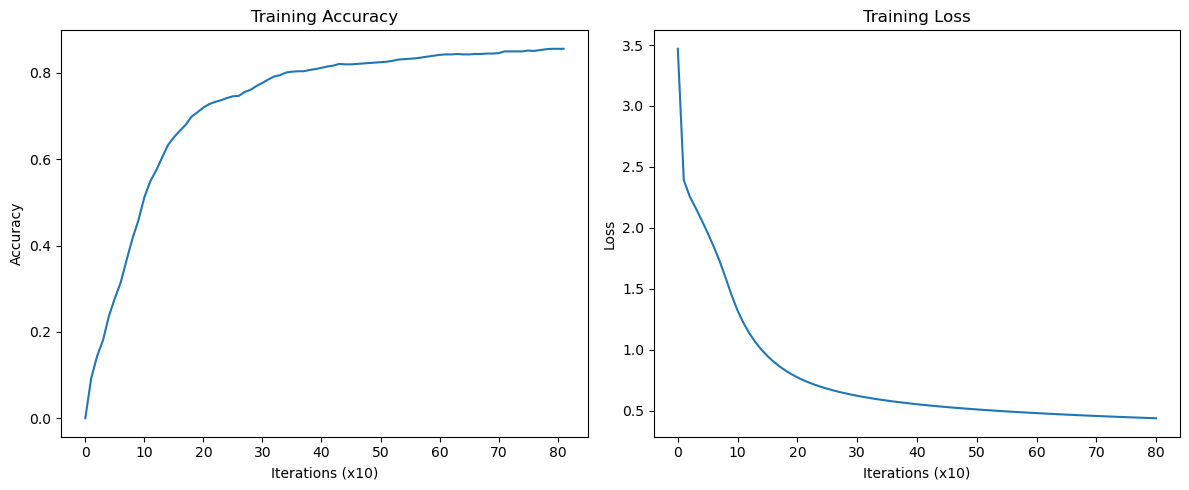

Iteration: 810
Accuracy:  0.857
Loss:  0.4373168111568021


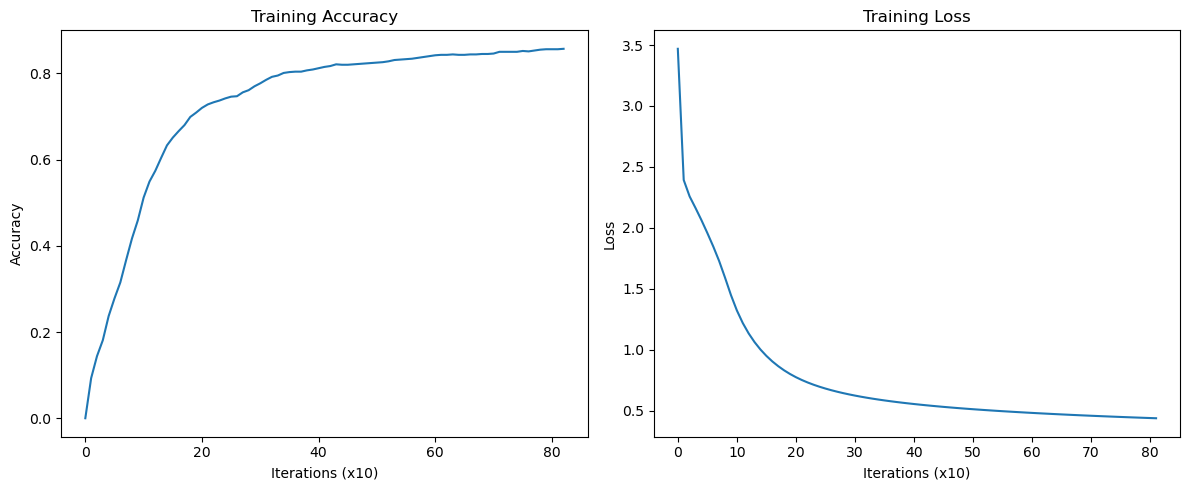

Iteration: 820
Accuracy:  0.857
Loss:  0.4356587172433307


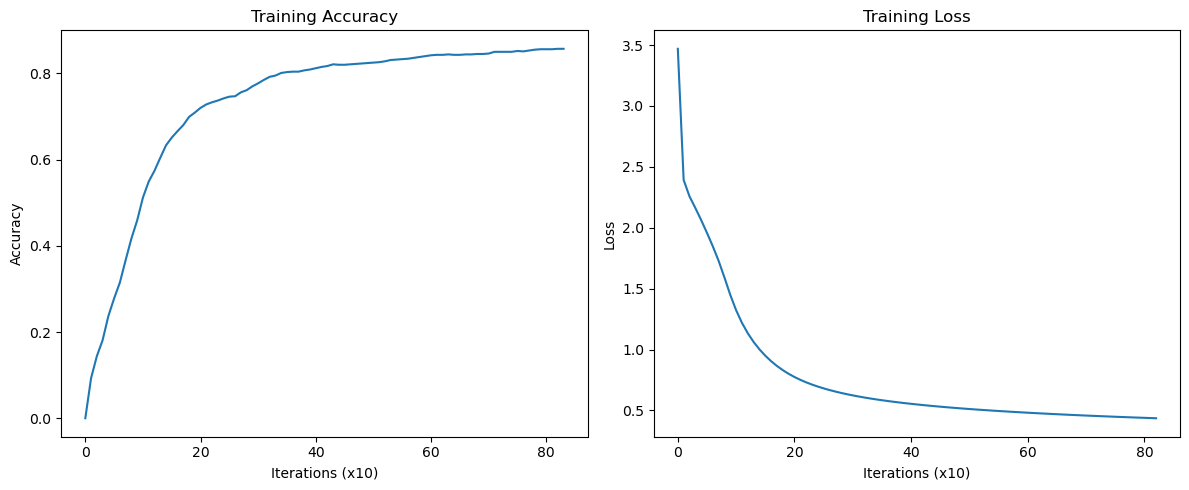

Iteration: 830
Accuracy:  0.857
Loss:  0.4340301251616238


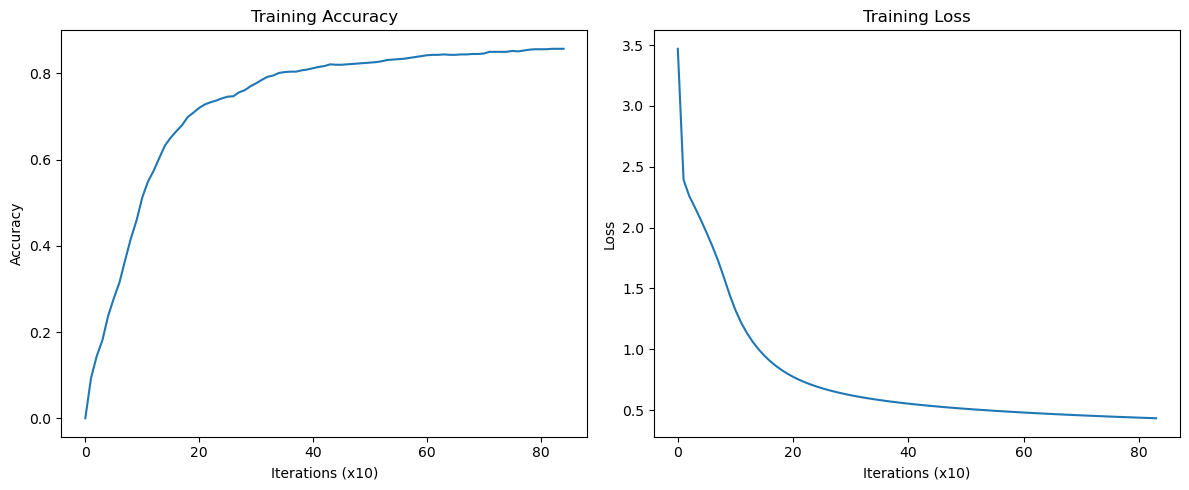

Iteration: 840
Accuracy:  0.857
Loss:  0.43243162085385256


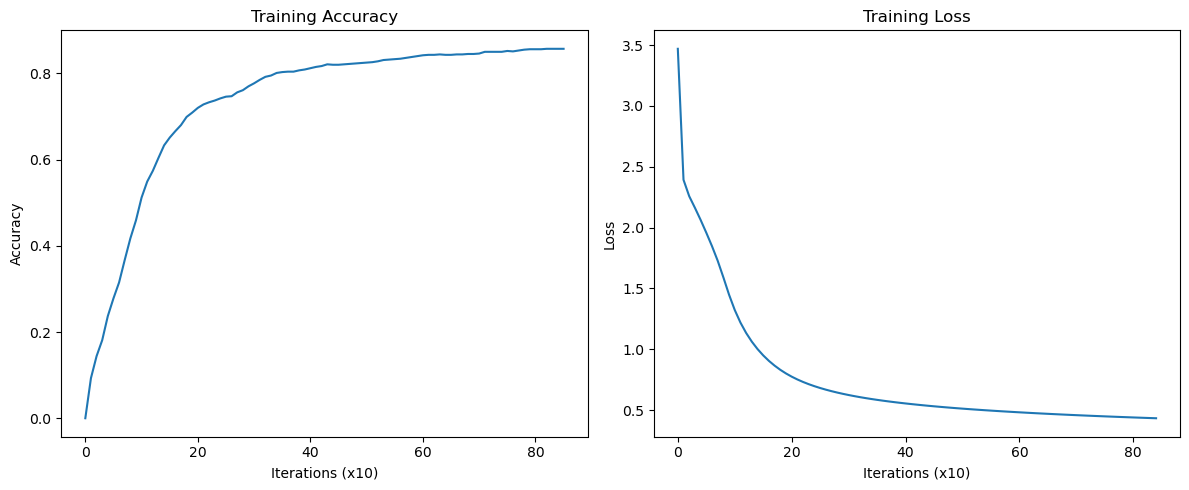

Iteration: 850
Accuracy:  0.857
Loss:  0.4308645621587725


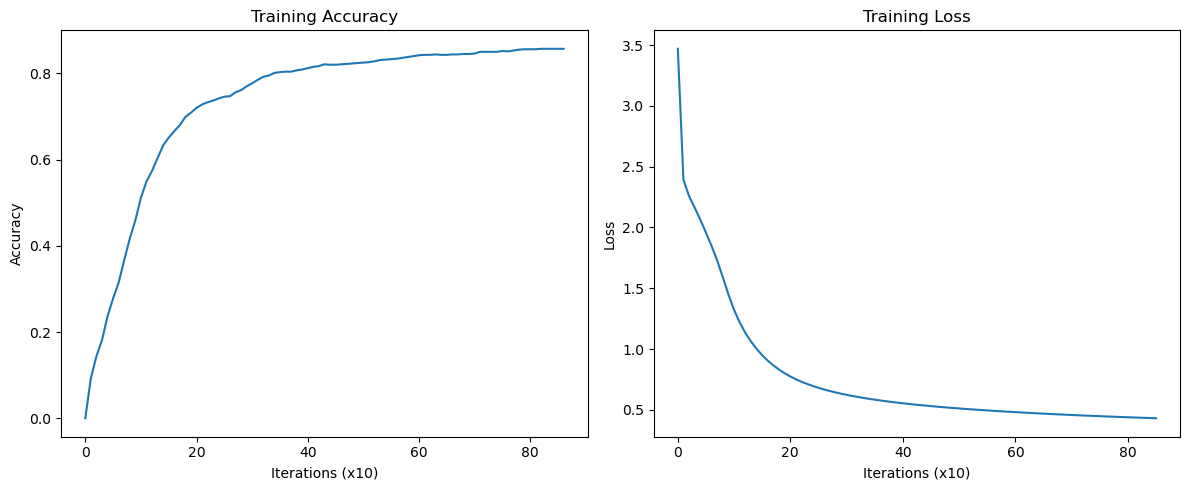

Iteration: 860
Accuracy:  0.858
Loss:  0.42932621129524945


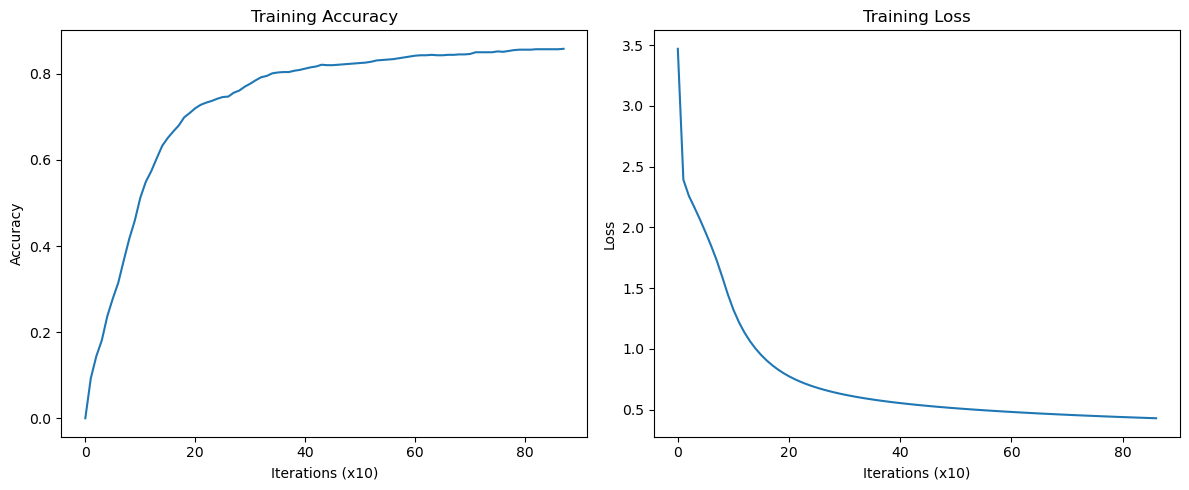

Iteration: 870
Accuracy:  0.858
Loss:  0.4278132481279171


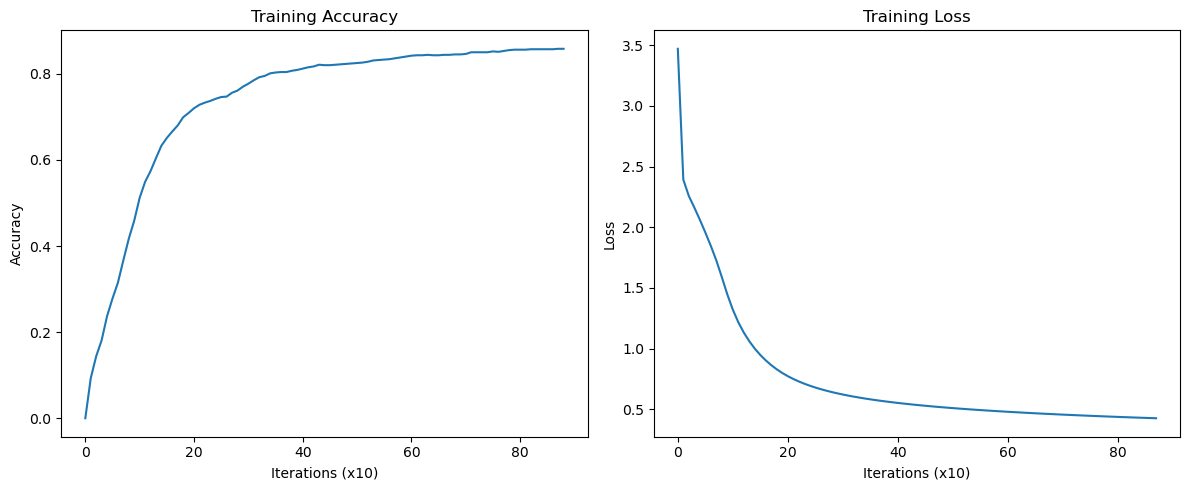

Iteration: 880
Accuracy:  0.859
Loss:  0.42632756622759993


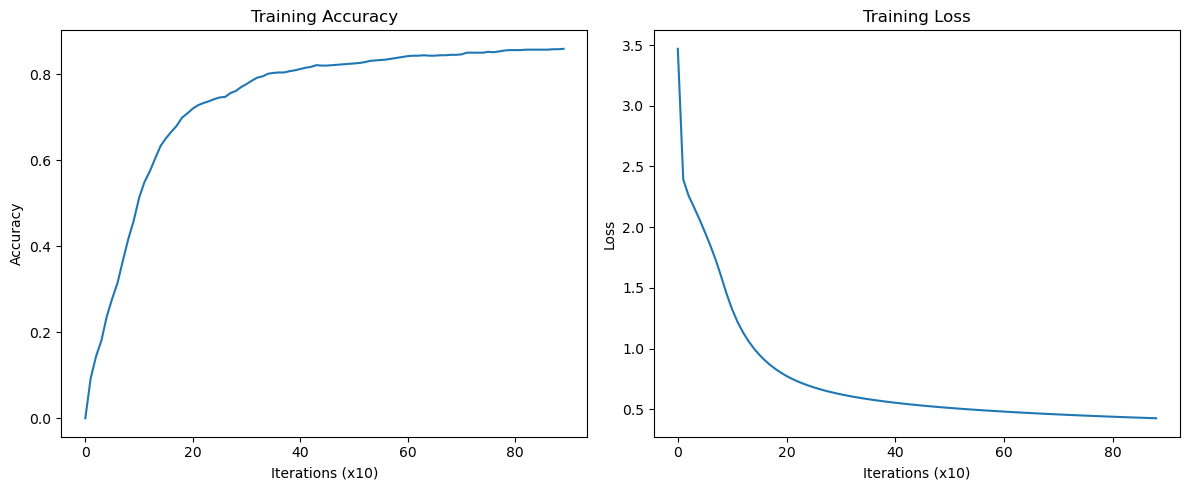

Iteration: 890
Accuracy:  0.858
Loss:  0.424868011294054


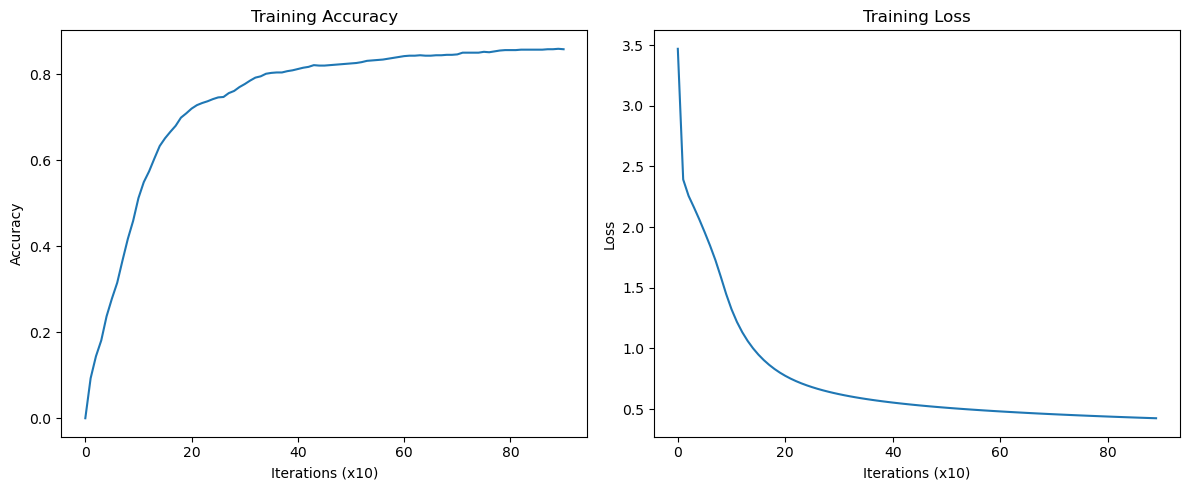

Iteration: 900
Accuracy:  0.859
Loss:  0.42343285418870125


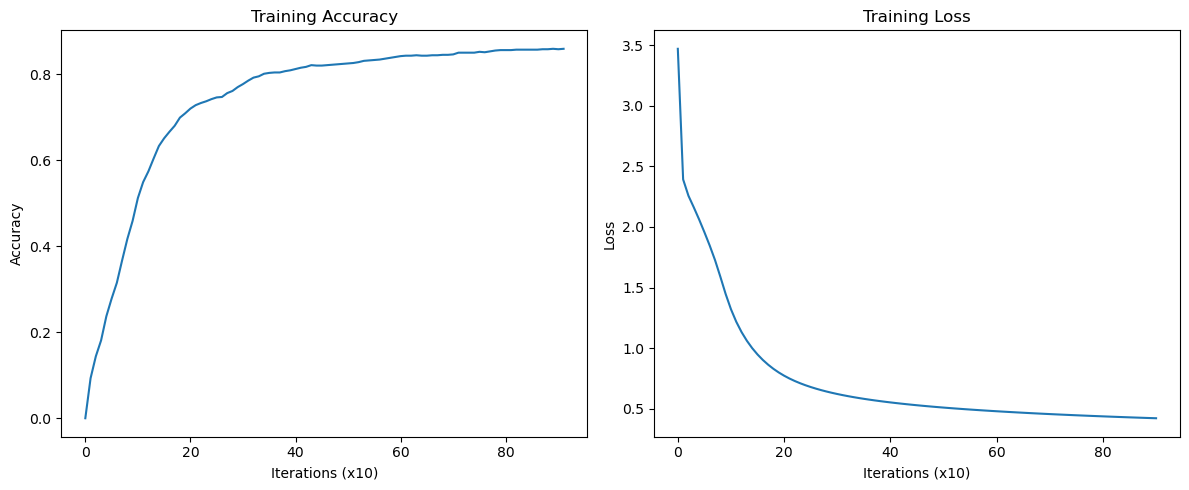

Iteration: 910
Accuracy:  0.859
Loss:  0.4220204494823246


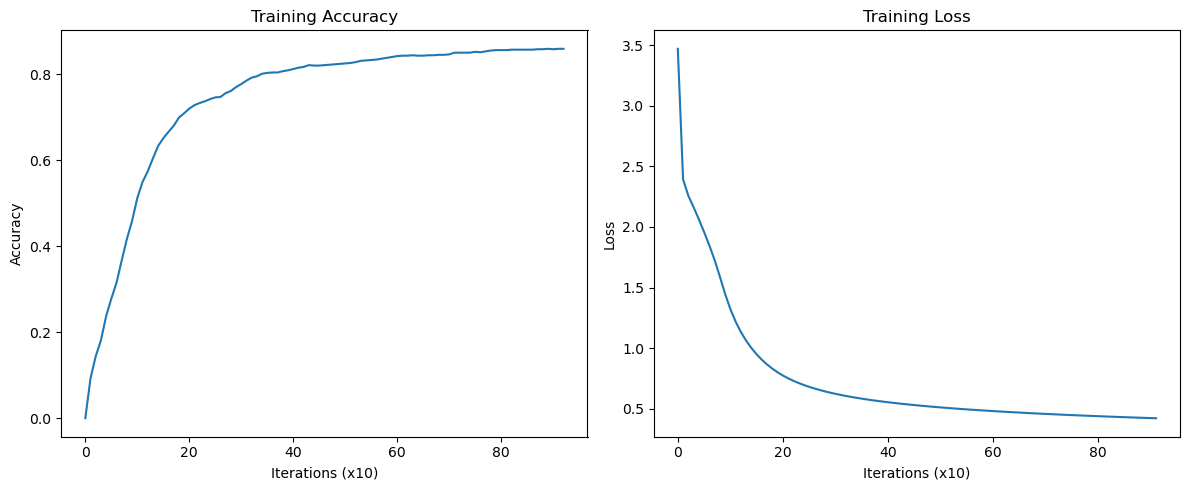

Iteration: 920
Accuracy:  0.858
Loss:  0.42062827822276144


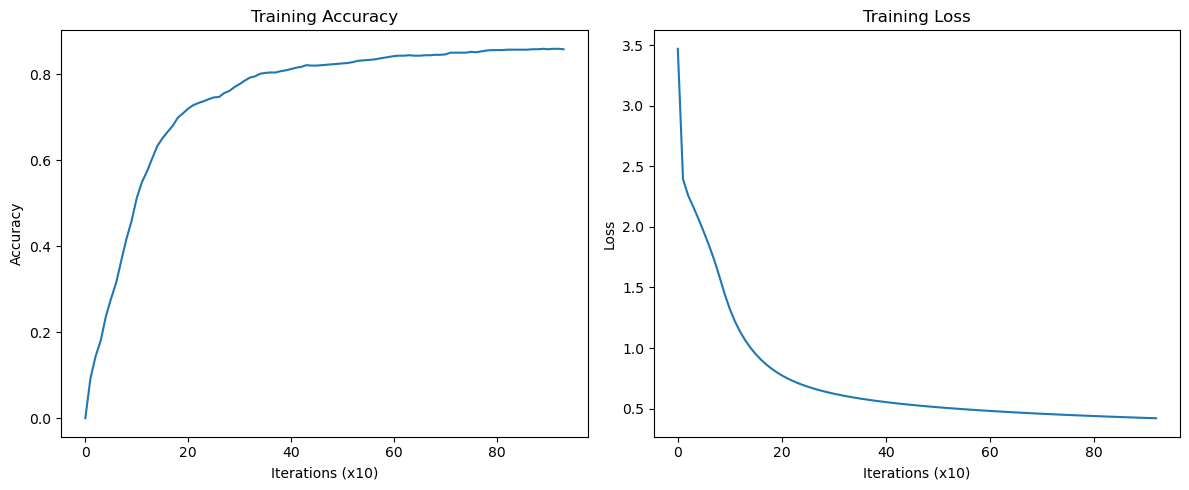

Iteration: 930
Accuracy:  0.861
Loss:  0.4192560038586937


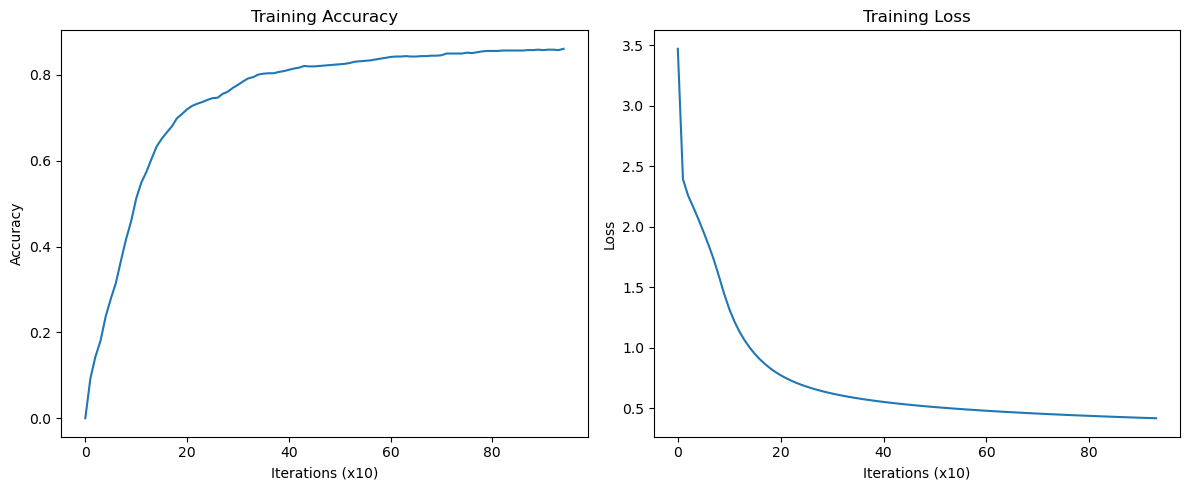

Iteration: 940
Accuracy:  0.862
Loss:  0.41790617910135947


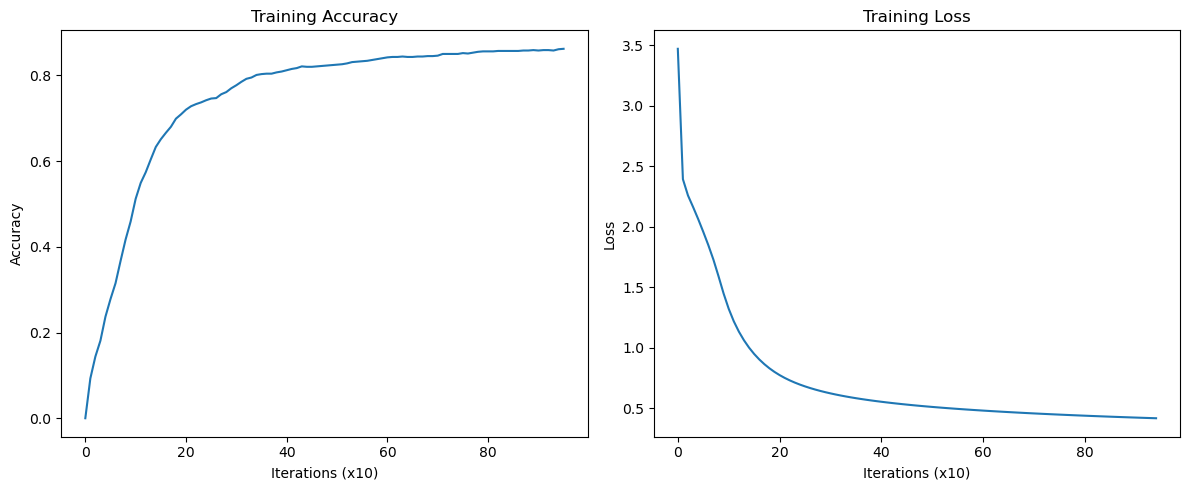

Iteration: 950
Accuracy:  0.864
Loss:  0.41657411835254143


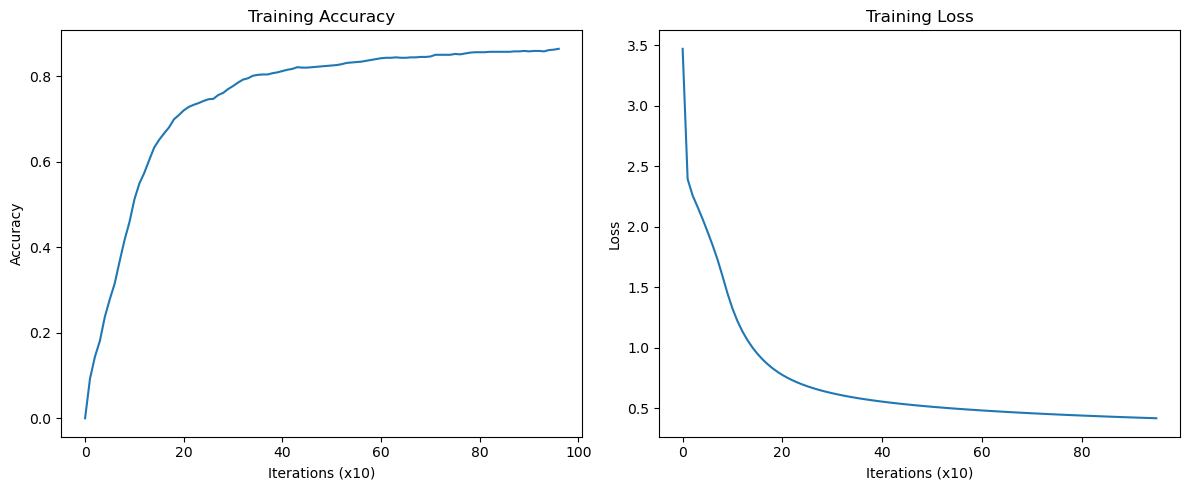

Iteration: 960
Accuracy:  0.864
Loss:  0.415260414192613


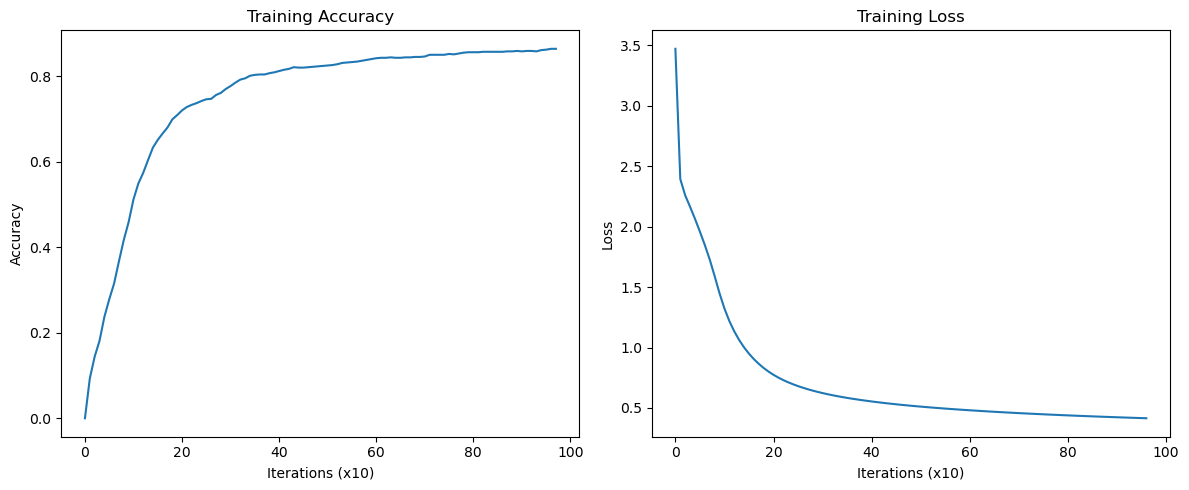

Iteration: 970
Accuracy:  0.865
Loss:  0.4139684357266437


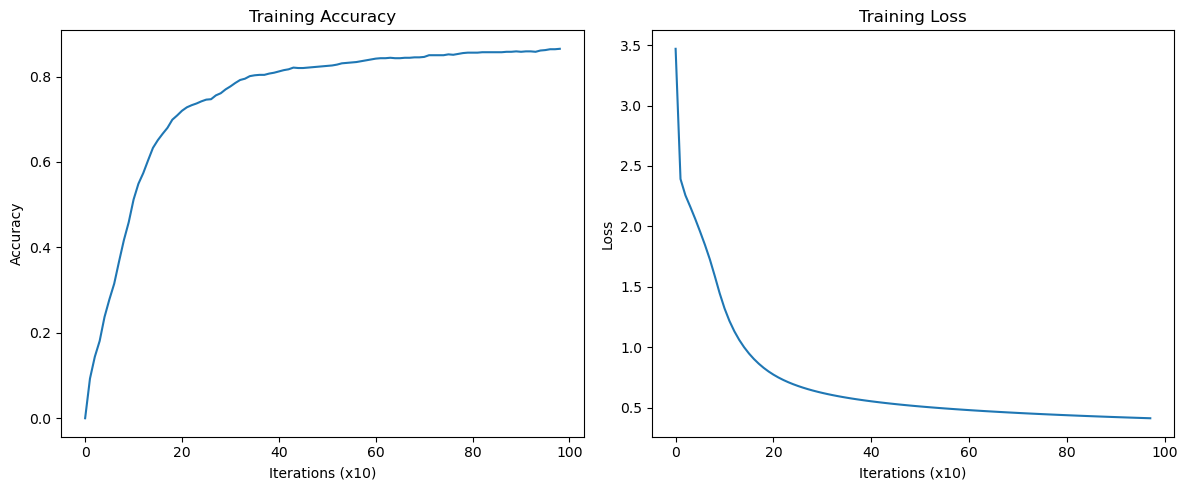

Iteration: 980
Accuracy:  0.865
Loss:  0.41269840315716405


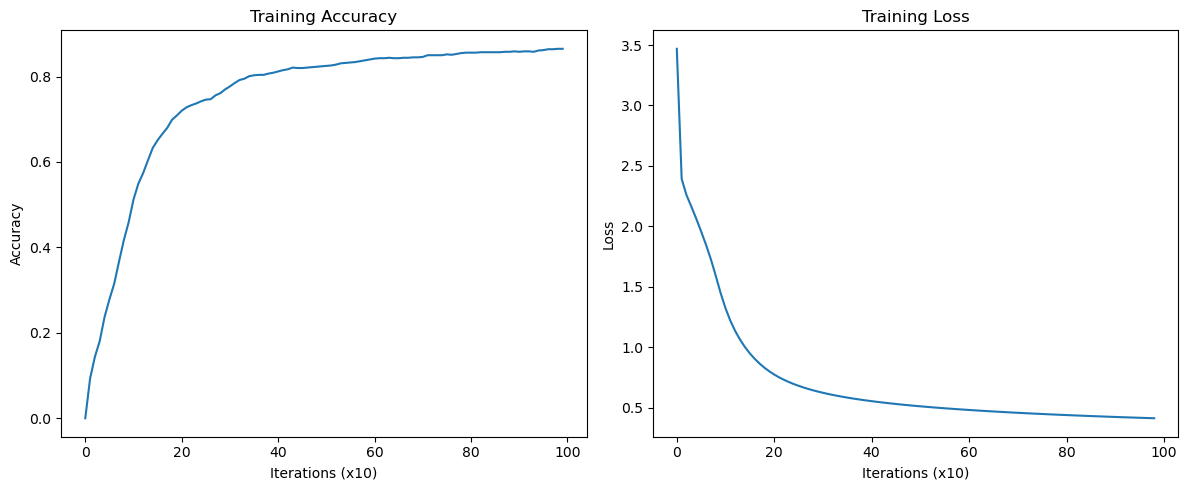

Iteration: 990
Accuracy:  0.866
Loss:  0.4114461979318228


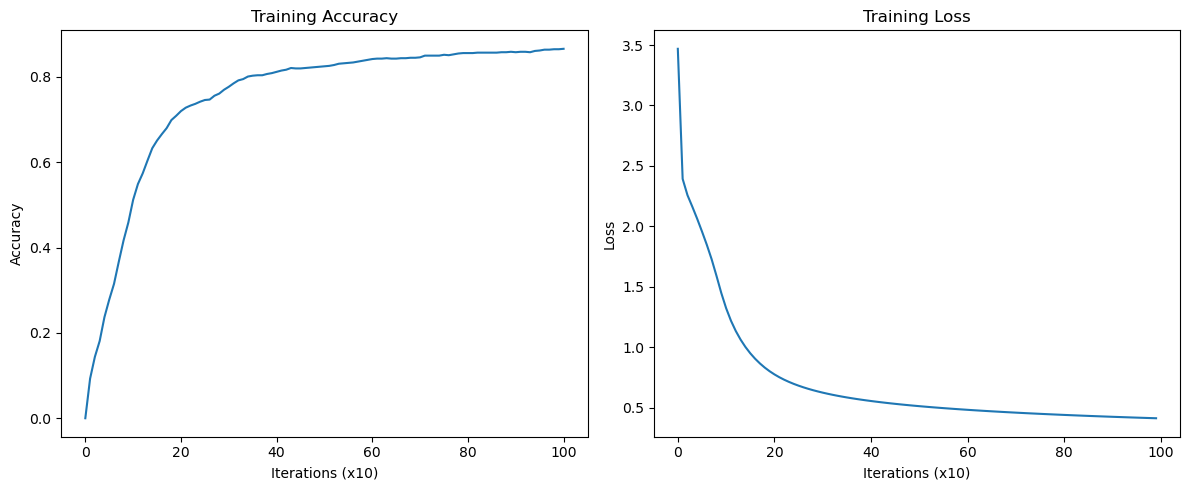

In [18]:
W1, b1, W2, b2 = gradient_descent(values_train, labels_train, ITERATIONS, ALPHA, values_validation, labels_validation)


In [19]:
def evaluate_model(W1, b1, W2, b2, values, labels):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, values)
    predictions = get_predictions(A2)
    accuracy = get_accuracy(predictions, labels)
    loss = cross_entropy_loss(A2, one_hot(labels))

    return accuracy, loss

print(evaluate_model(W1, b1, W2, b2, values_test, labels_test))

(0.863, 0.44821441458175)
